In [2]:
import sys
import numpy as np
%matplotlib inline
import json
import keras
import json
import matplotlib.pyplot as plt
import os

from pandas import DataFrame

from scipy import stats

from fanova import fANOVA
from fanova import visualizer

import ConfigSpace as CS

import seaborn
seaborn.set_style(style='whitegrid')


plt.rcParams['figure.figsize'] = (8.0, 6.0)
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rc('font', size=15.0, family='serif')
plt.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]

In [14]:
datasets = ["mnist"]

results = dict()

r = dict()
for d in datasets:
    p = dict()
    validation_error = []
    validation_loss = []
    runtime = []
    configs = []
    params = []
    
    n_runs = 300
    for i in range(n_runs):
        try:
            from os.path import abspath, join as path_join
            config_path = "%s/config_%d.json" % (d, i)
            filename = path_join(abspath("."), "..", "experiments/results/", config_path)
            with open(filename, "r") as f:
                res = json.load(f)
                print(res)
        except FileNotFoundError:
            print(i, d)
            continue

        runtime.append(res["runtime"])
        configs.append(res["configs"])
        #params.append(res["params"])

    p["validation_error"] = np.array(validation_error)
    p["runtime"] = np.array(runtime)
    #p["params"] = np.array(params)
    p["configs"] = configs

    results[d] = p


0 mnist
{'test_accuracy': 0.7678, 'config_id': 1, 'train_accuracy': 0.9997495993589743, 'runtime': 13975.547268629074}


KeyError: 'configs'

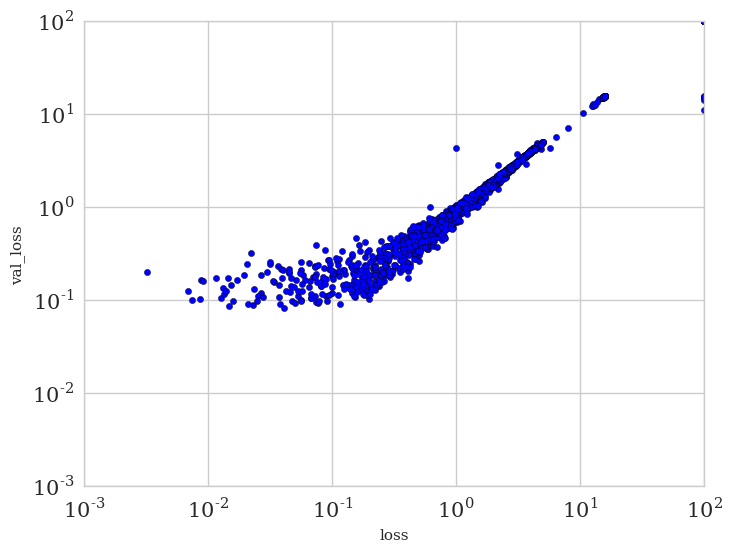

In [299]:
loss = [np.nan_to_num(results["res_nets"]["letter"]["lc"][i]["loss"][-1]) for i in range(2000)]
val_loss = [np.nan_to_num(results["res_nets"]["letter"]["lc"][i]["val_loss"][-1]) for i in range(2000)]
loss = np.array(loss)
val_loss = np.array(val_loss)
loss[loss == 0] = 100
val_loss[val_loss == 0] = 100

plt.scatter(loss, val_loss)
plt.yscale("log")
plt.xscale("log")
plt.xlim(1e-3, 100)
plt.ylim(1e-3, 100)
plt.xlabel("loss")
plt.ylabel("val_loss")

1606


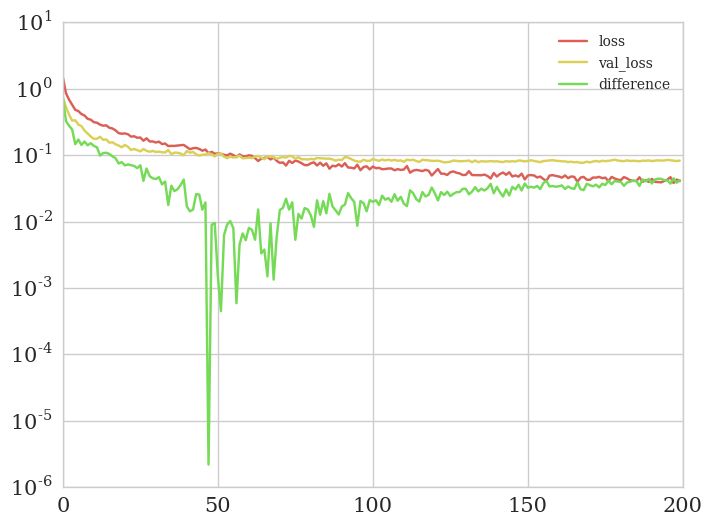

1752


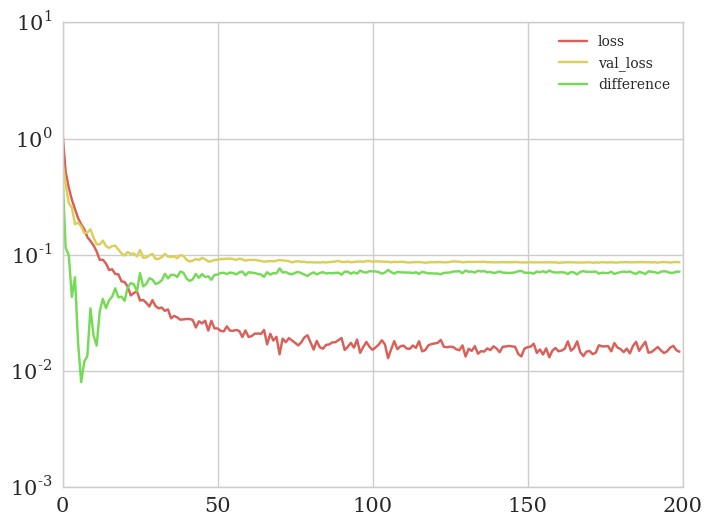

1357


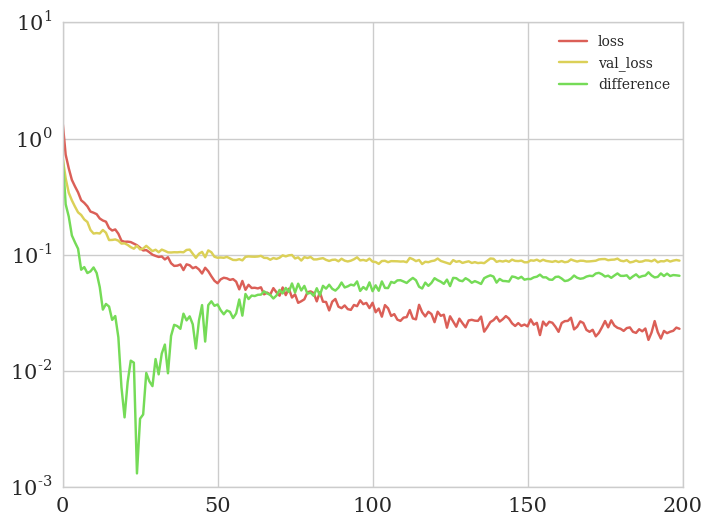

197


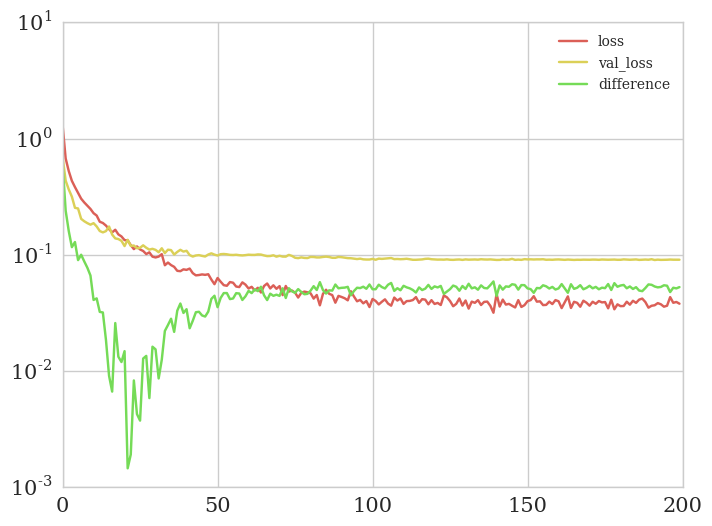

1852


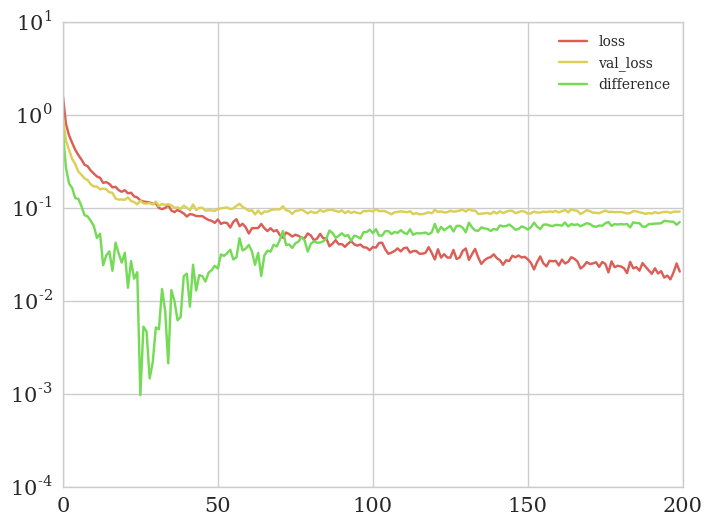

In [317]:
for b in np.argsort(val_loss)[:5]:
    print(b)
    plt.plot(results["res_nets"]["letter"]["lc"][b]["loss"], label="loss")
    plt.plot(results["res_nets"]["letter"]["lc"][b]["val_loss"], label="val_loss")
    plt.plot(np.abs(np.array(results["res_nets"]["letter"]["lc"][b]["val_loss"])-np.array(results["res_nets"]["letter"]["lc"][b]["loss"])), label="difference")
    #plt.xscale("log")
    plt.yscale("log")
    plt.legend()
    plt.show()

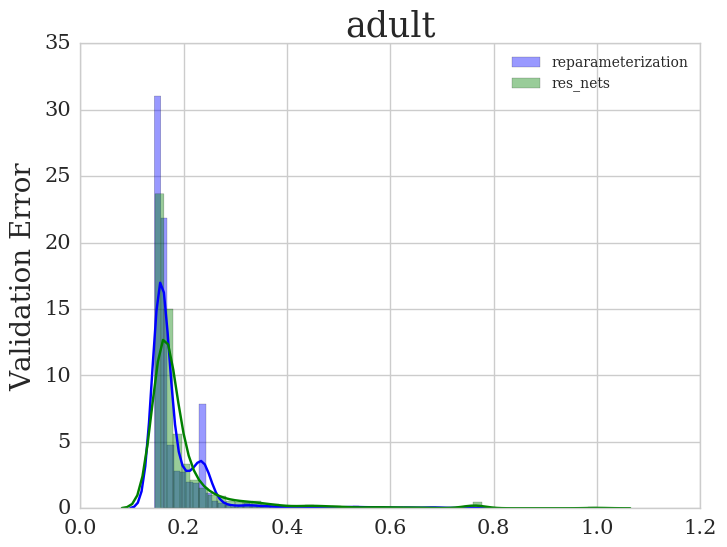

In [321]:

dataset = "adult"

seaborn.distplot(results["reparameterization"][dataset]["validation_error"][:2000], label='reparameterization', norm_hist=True,  color="blue")
seaborn.distplot(results["res_nets"][dataset]["validation_error"], label='res_nets', norm_hist=True, color="green")
plt.legend()
plt.ylabel("Validation Error", fontsize=20)
plt.title(dataset, fontsize=25)

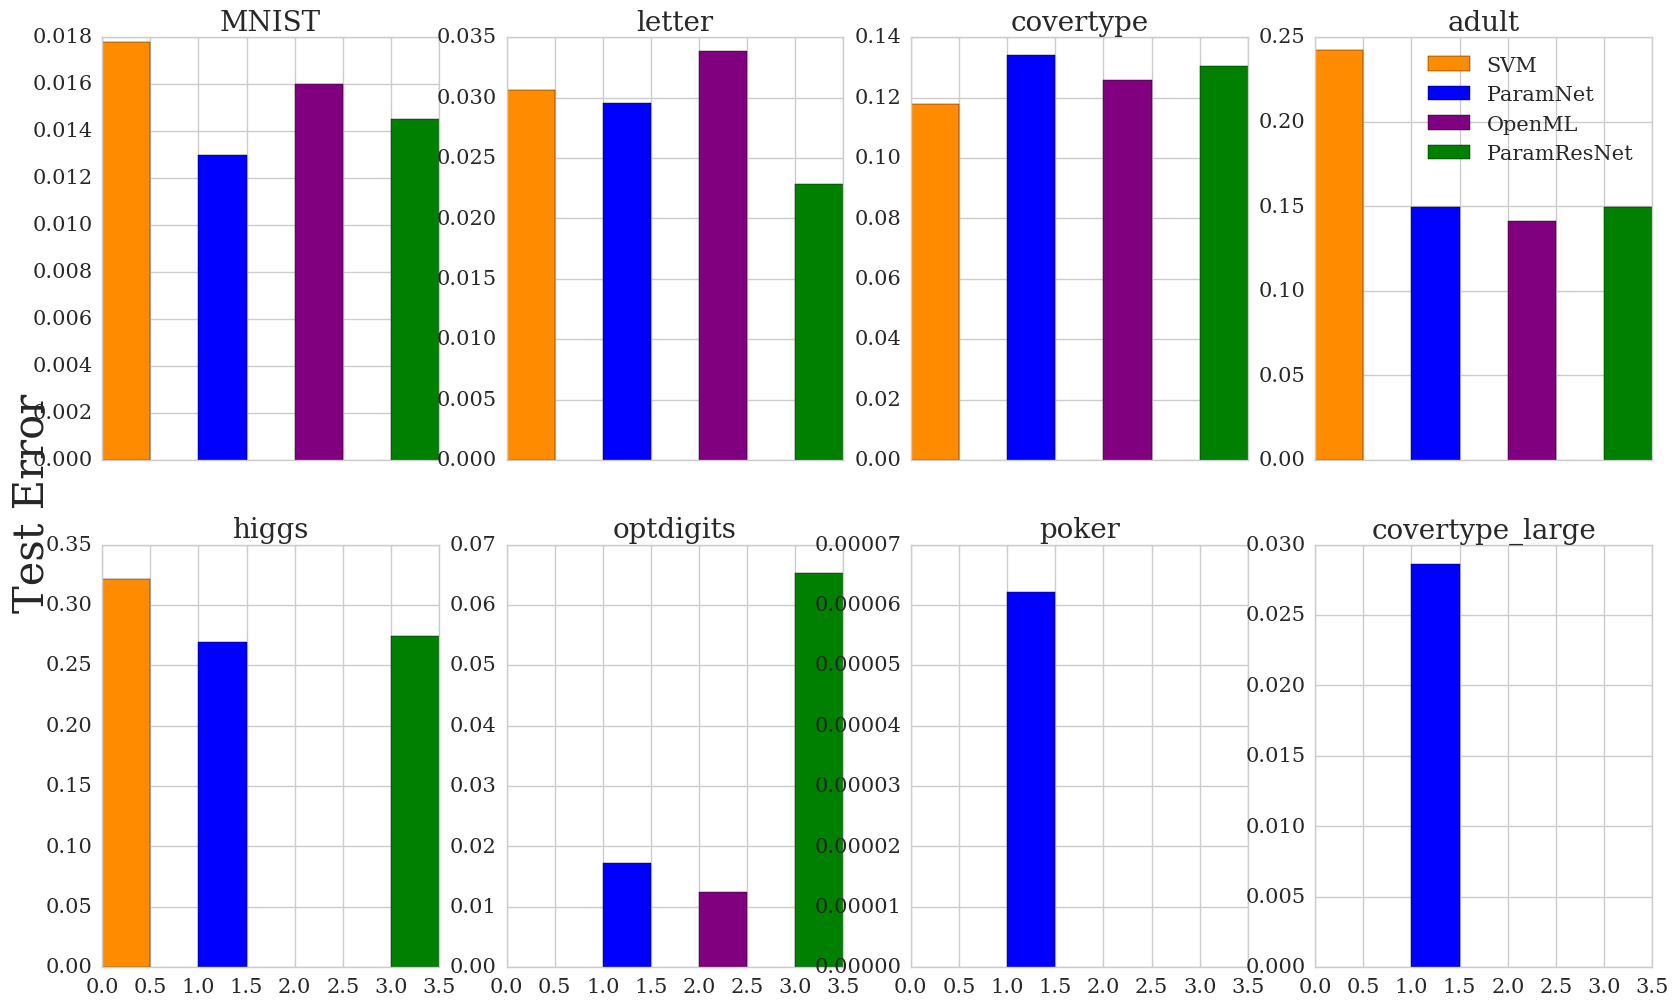

In [244]:
soat_mnist = .016
openml_letter = 1 - .9661
openml_covertype = 1 - .8743
openml_adult = 1 - .8585
openml_optdigits = 1 - .9876

f, axarr = plt.subplots(2, 4, sharex=True, figsize=(20, 12))

svm = json.load(open("/mhome/kleinaa/experiments/fabolas/results/svm_mnist/ei_0/results_0.json"))["test_error"][-1]
axarr[0, 0].bar(0, svm, width=0.5, color="darkorange")
reparam = 1 - json.load(open("/mhome/kleinaa/experiments/architecture_search/dataset/reparameterization_test_error/mnist/best_config.json"))["hist"]["val_acc"][-1]
axarr[0, 0].bar(1, reparam, width=0.5, color="blue")
axarr[0, 0].bar(2, soat_mnist, width=0.5, color="purple")
res_net = 1 - json.load(open("/mhome/kleinaa/experiments/architecture_search/dataset/res_nets_test_error/mnist//best_config.json"))["hist"]["val_acc"][-1]
axarr[0, 0].bar(3, res_net, width=0.5, color="green")
axarr[0, 0].set_title("MNIST", fontsize=20)

svm = json.load(open("/mhome/kleinaa/experiments/fabolas/results/svm_letter/ei_0/results_0.json"))["test_error"][-1]
axarr[0, 1].bar(0, svm, width=0.5, color="darkorange")
reparam = 1 - json.load(open("/mhome/kleinaa/experiments/architecture_search/dataset/reparameterization_test_error/letter/best_config.json"))["hist"]["val_acc"][-1]
axarr[0, 1].bar(1, reparam, width=0.5, color="blue")
axarr[0, 1].bar(2, openml_letter, width=0.5, color="purple")
res_net = 1 - json.load(open("/mhome/kleinaa/experiments/architecture_search/dataset/res_nets_test_error/letter/best_config.json"))["hist"]["val_acc"][-1]
axarr[0, 1].bar(3, res_net, width=0.5, color="green")
axarr[0, 1].set_title("letter", fontsize=20)

svm = json.load(open("/mhome/kleinaa/experiments/fabolas/results/svm_covertype/ei_0/results_0.json"))["test_error"][-1]
axarr[0, 2].bar(0, svm, width=0.5, color="darkorange")
reparam = 1 - json.load(open("/mhome/kleinaa/experiments/architecture_search/dataset/reparameterization_test_error/covertype/best_config.json"))["hist"]["val_acc"][-1]
axarr[0, 2].bar(1, reparam, width=0.5, color="blue")
axarr[0, 2].bar(2, openml_covertype, width=0.5, color="purple")
res_net = 1 - json.load(open("/mhome/kleinaa/experiments/architecture_search/dataset/res_nets_test_error/covertype/best_config.json"))["hist"]["val_acc"][-1]
axarr[0, 2].bar(3, res_net, width=0.5, color="green")
axarr[0, 2].set_title("covertype", fontsize=20)

svm = json.load(open("/mhome/kleinaa/experiments/fabolas/results/svm_adult/ei_0/results_0.json"))["test_error"][-1]
axarr[0, 3].bar(0, svm, width=0.5, color="darkorange", label="SVM")
reparam = 1 - json.load(open("/mhome/kleinaa/experiments/architecture_search/dataset/reparameterization_test_error/adult/best_config.json"))["hist"]["val_acc"][-1]
axarr[0, 3].bar(1, reparam, width=0.5, color="blue", label="ParamNet")
axarr[0, 3].bar(2, openml_adult, width=0.5, color="purple", label="OpenML")
res_net = 1 - json.load(open("/mhome/kleinaa/experiments/architecture_search/dataset/res_nets_test_error/adult/best_config.json"))["hist"]["val_acc"][-1]
axarr[0, 3].bar(3, res_net, width=0.5, color="green", label="ParamResNet")
axarr[0, 3].set_title("adult", fontsize=20)
axarr[0, 3].legend(fontsize=15)

svm = json.load(open("/mhome/kleinaa/experiments/fabolas/results/svm_higgs/ei_0/results_0.json"))["test_error"][-1]
axarr[1, 0].bar(0, svm, width=0.5, color="darkorange")
reparam = 1 - json.load(open("/mhome/kleinaa/experiments/architecture_search/dataset/reparameterization_test_error/higgs/best_config.json"))["hist"]["val_acc"][-1]
axarr[1, 0].bar(1, reparam, width=0.5, color="blue")
res_net = 1 - json.load(open("/mhome/kleinaa/experiments/architecture_search/dataset/res_nets_test_error/higgs/best_config.json"))["hist"]["val_acc"][-1]
axarr[1, 0].bar(3, res_net, width=0.5, color="green")
axarr[1, 0].set_title("higgs", fontsize=20)

reparam = 1 - json.load(open("/mhome/kleinaa/experiments/architecture_search/dataset/reparameterization_test_error/optdigits/best_config.json"))["hist"]["val_acc"][-1]
axarr[1, 1].bar(1, reparam, width=0.5, color="blue")
axarr[1, 1].bar(2, openml_optdigits, width=0.5, color="purple")
res_net = 1 - json.load(open("/mhome/kleinaa/experiments/architecture_search/dataset/res_nets_test_error/optdigits/best_config.json"))["hist"]["val_acc"][-1]
axarr[1, 1].bar(3, res_net, width=0.5, color="green")
axarr[1, 1].set_title("optdigits", fontsize=20)

reparam = 1 - json.load(open("/mhome/kleinaa/experiments/architecture_search/dataset/reparameterization_test_error/poker/best_config.json"))["hist"]["val_acc"][-1]
axarr[1, 2].bar(1, reparam, width=0.5, color="blue")
axarr[1, 2].set_title("poker", fontsize=20)
                     
reparam = 1 - json.load(open("/mhome/kleinaa/experiments/architecture_search/dataset/reparameterization_test_error/covertype_large/best_config.json"))["hist"]["val_acc"][-1]
axarr[1, 3].bar(1, reparam, width=0.5, color="blue")
axarr[1, 3].set_title("covertype_large", fontsize=20)

f.add_subplot(111, frameon=False)
plt.grid(False)
plt.tick_params(labelcolor='none', top='off', bottom='off', left='off', right='off')
plt.ylabel("Test Error", fontsize=30)
plt.show()

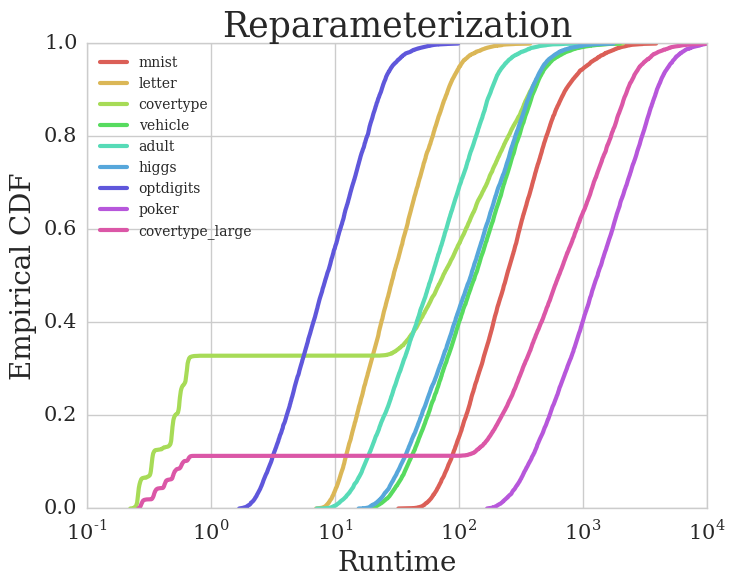

In [50]:
current_palette = seaborn.color_palette("hls", len(datasets))
seaborn.set_palette(current_palette)

for i, d in enumerate(datasets):
    
    linestyle = ["--", ":"]

    sorted_error = np.sort(results["reparameterization"][d]["runtime"])
    yvals = np.arange(len(sorted_error))/float(len(sorted_error))
    plt.plot(sorted_error, yvals, linewidth=3, label=d)

plt.legend(loc=2, fontsize=10)
plt.xscale("log")
plt.ylabel("Empirical CDF", size=20)
plt.xlabel("Runtime", fontsize=20)
plt.title('Reparameterization', fontsize=25)

plt.show()


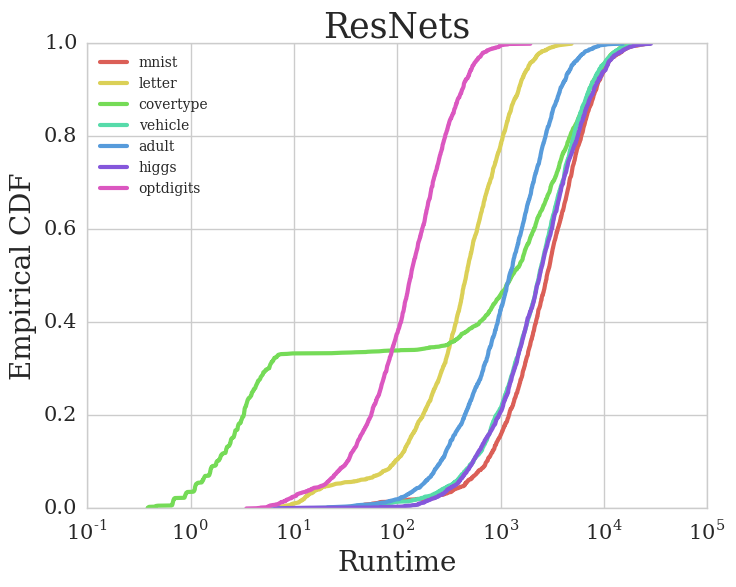

In [210]:
current_palette = seaborn.color_palette("hls", len(datasets))
seaborn.set_palette(current_palette)

for i, d in enumerate(datasets):
    
    linestyle = ["--", ":"]

    sorted_error = np.sort(results["res_nets"][d]["runtime"])
    yvals = np.arange(len(sorted_error))/float(len(sorted_error))
    plt.plot(sorted_error, yvals, linewidth=3, label=d)

plt.legend(loc=2, fontsize=10)
plt.xscale("log")
plt.ylabel("Empirical CDF", size=20)
plt.xlabel("Runtime", fontsize=20)
plt.title('ResNets', fontsize=25)

plt.show()


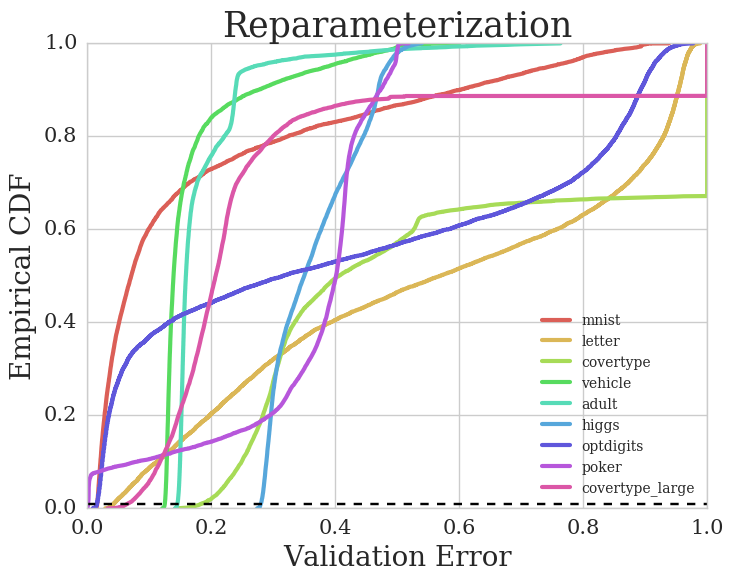

In [51]:
#colors = ["blue", "green", "purple", "darkorange", "magenta"]
current_palette = seaborn.color_palette("hls", len(datasets))
seaborn.set_palette(current_palette)

for i, d in enumerate(datasets):
    
    linestyle = ["--", ":"]

    sorted_error = np.sort(results["reparameterization"][d]["validation_error"])
    yvals = np.arange(len(sorted_error))/float(len(sorted_error))
    plt.plot(sorted_error, yvals, linewidth=3, label=d)

plt.legend(loc=4, fontsize=10)
#plt.xscale("log")
plt.ylabel("Empirical CDF", size=20)
plt.xlabel("Validation Error", fontsize=20)
plt.title('Reparameterization', fontsize=25)
plt.axhline(0.01, color='k', linestyle='--')

plt.show()

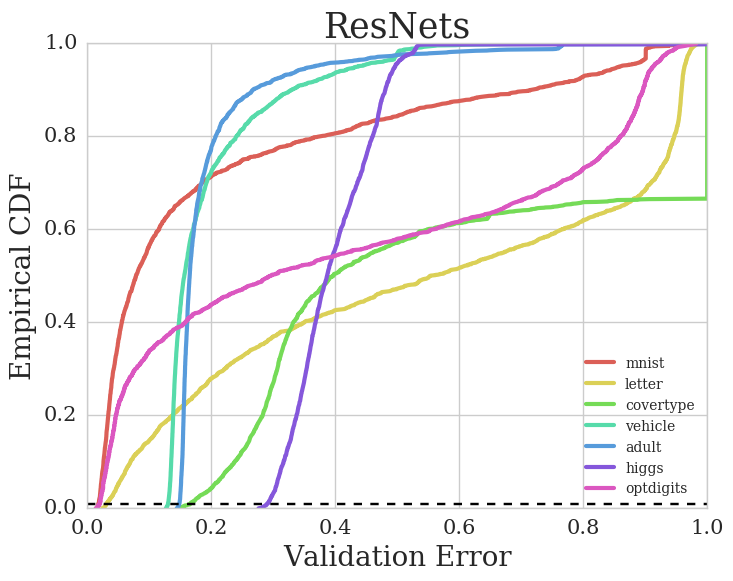

In [211]:
#colors = ["blue", "green", "purple", "darkorange", "magenta"]
current_palette = seaborn.color_palette("hls", len(datasets))
seaborn.set_palette(current_palette)

for i, d in enumerate(datasets):
    
    linestyle = ["--", ":"]

    sorted_error = np.sort(results["res_nets"][d]["validation_error"])
    yvals = np.arange(len(sorted_error))/float(len(sorted_error))
    plt.plot(sorted_error, yvals, linewidth=3, label=d)

plt.legend(loc=4, fontsize=10)
#plt.xscale("log")
plt.ylabel("Empirical CDF", size=20)
plt.xlabel("Validation Error", fontsize=20)
plt.title('ResNets', fontsize=25)
plt.axhline(0.01, color='k', linestyle='--')

plt.show()

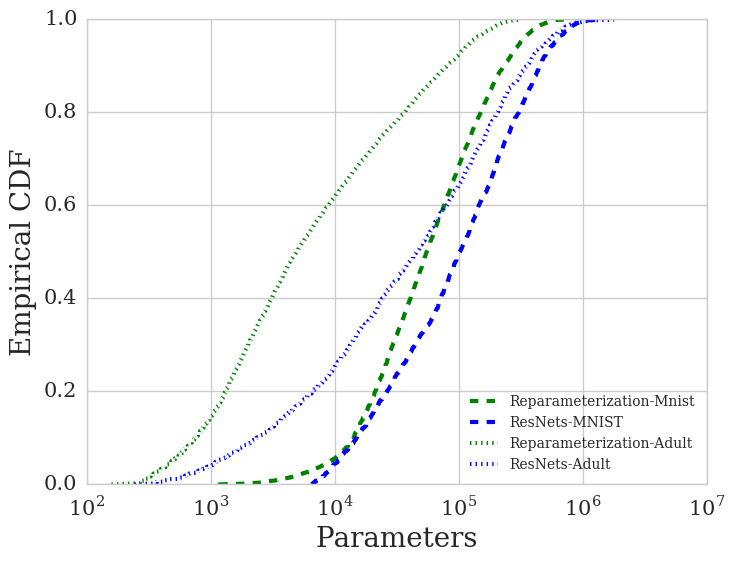

In [256]:
sorted_error = np.sort(results["reparameterization"]["mnist"]["params"])
yvals = np.arange(len(sorted_error))/float(len(sorted_error))
plt.plot(sorted_error, yvals, linewidth=3, linestyle="--", label="Reparameterization-Mnist", color="green")

sorted_error = np.sort(results["res_nets"]["mnist"]["params"])
yvals = np.arange(len(sorted_error))/float(len(sorted_error))
plt.plot(sorted_error, yvals, linewidth=3, linestyle="--", label="ResNets-MNIST", color="blue")

sorted_error = np.sort(results["reparameterization"]["adult"]["params"])
yvals = np.arange(len(sorted_error))/float(len(sorted_error))
plt.plot(sorted_error, yvals, linewidth=3, linestyle=":", label="Reparameterization-Adult", color="green")

sorted_error = np.sort(results["res_nets"]["adult"]["params"])
yvals = np.arange(len(sorted_error))/float(len(sorted_error))
plt.plot(sorted_error, yvals, linewidth=3, linestyle=":", label="ResNets-Adult", color="blue")


plt.legend(loc=4, fontsize=10)
plt.xscale("log")
plt.ylabel("Empirical CDF", size=20)
plt.xlabel("Parameters", fontsize=20)
plt.show()

# Standard Parameterization

In [6]:
dataset = "mnist"

order = ['initial_lr', 'final_lr_fraction', 'batch_size', 'num_layers',
         'num_units_1', 'dropout_1',
         'num_units_2', 'dropout_2',
         'num_units_3', 'dropout_3',
         'num_units_4', 'dropout_4',
         'num_units_5', 'dropout_5']
         
X = []

for c in results["standard_parameterization"][dataset]["configs"]:
    vec = []
    for j, k in enumerate(order):
        if c[k] is not None:
            vec.append(c[k])
        else:
            vec.append(0)
    X.append(vec)
X = np.array(X)
y = results["standard_parameterization"][dataset]["validation_error"]

initial_lr


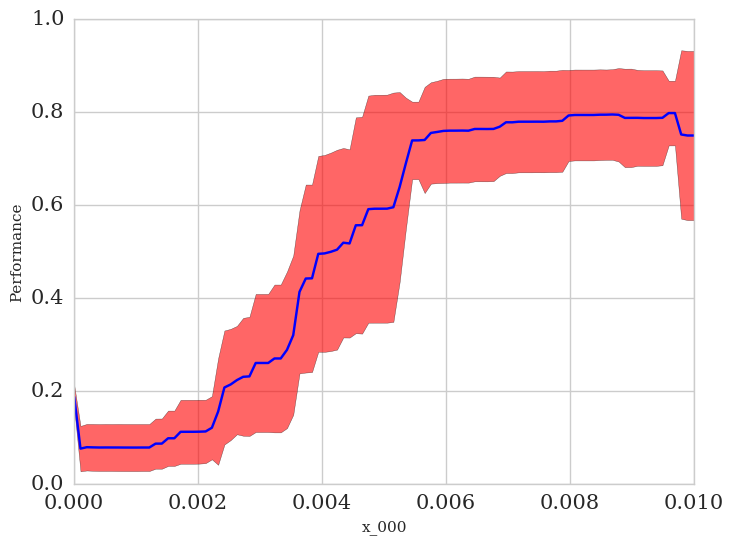

final_lr_fraction


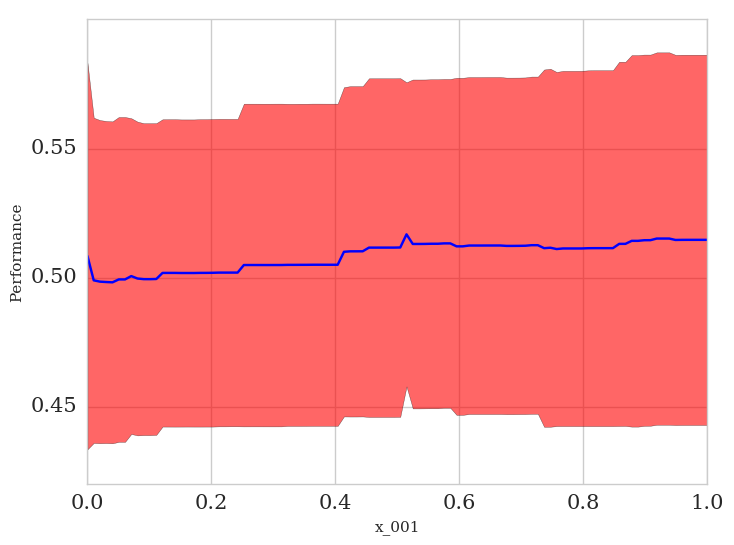

batch_size


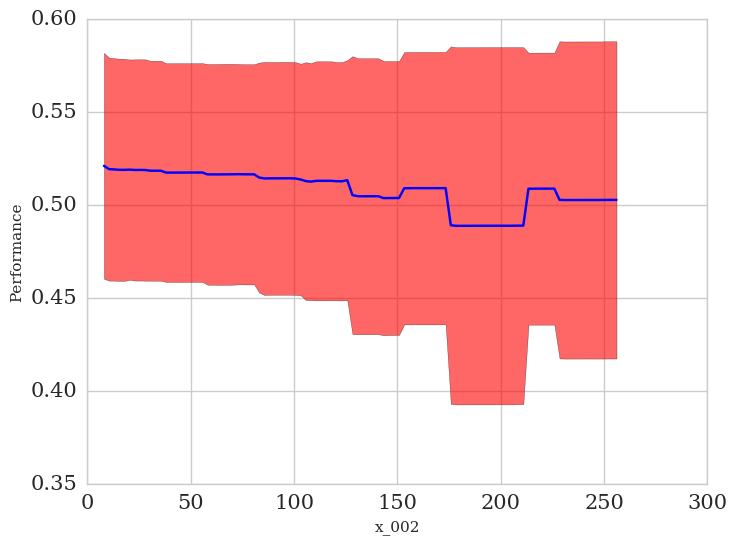

num_layers


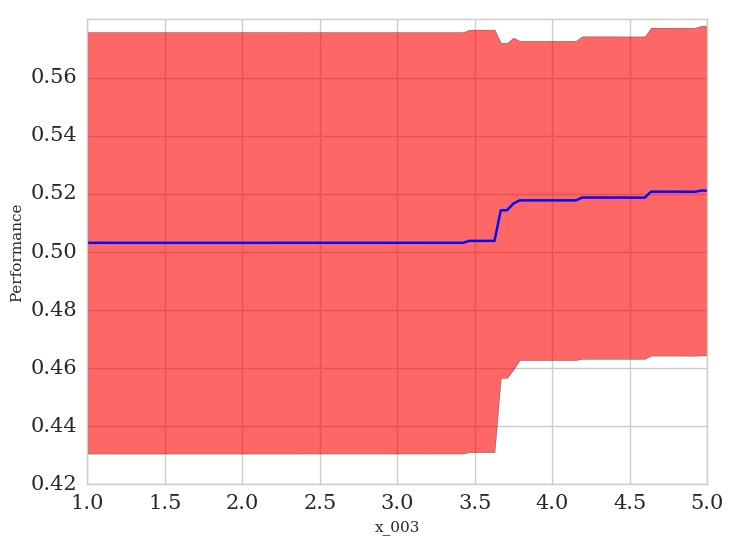

num_units_1


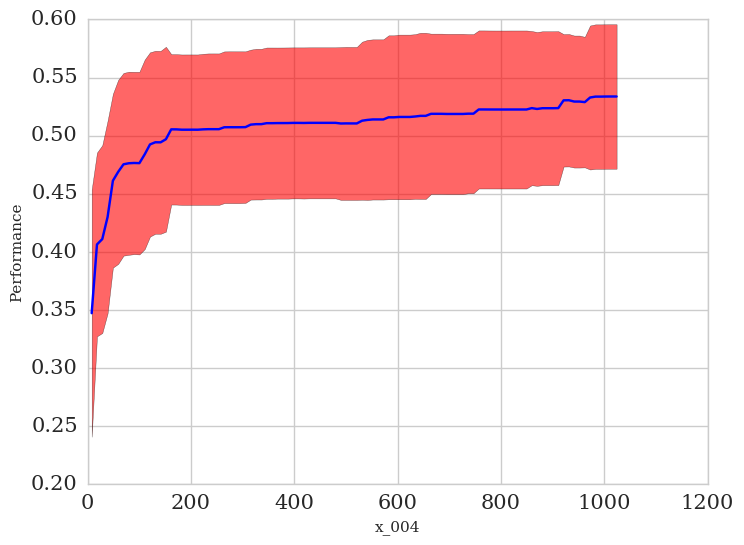

dropout_1


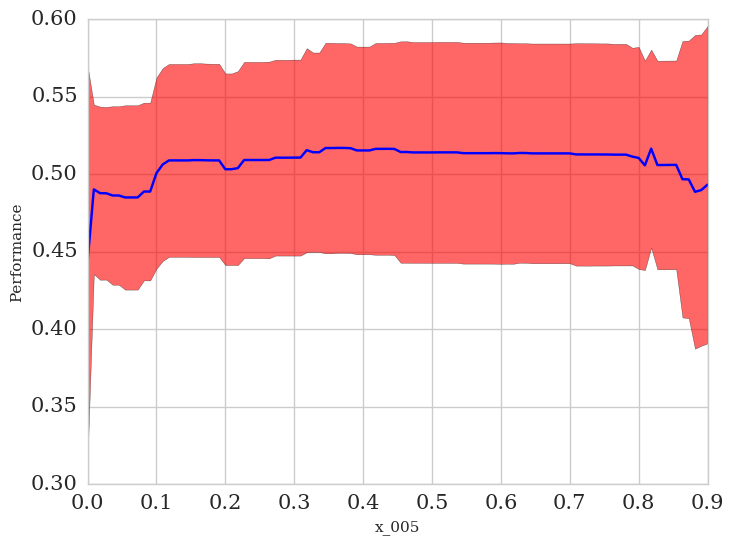

num_units_2


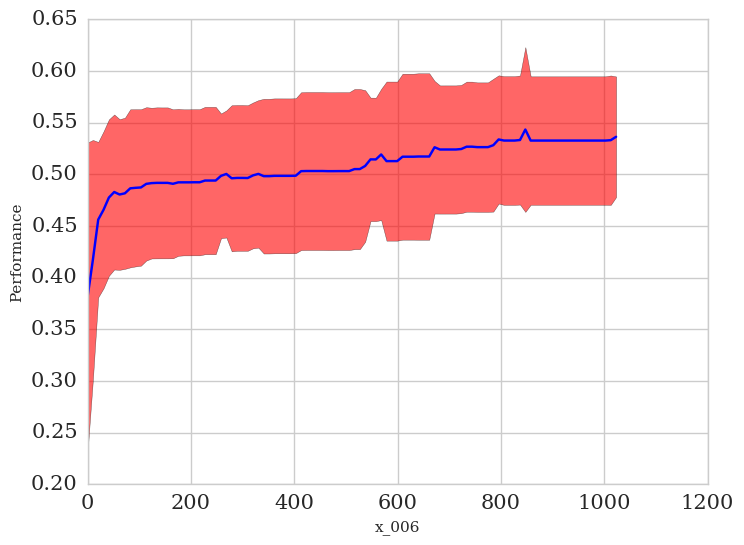

dropout_2


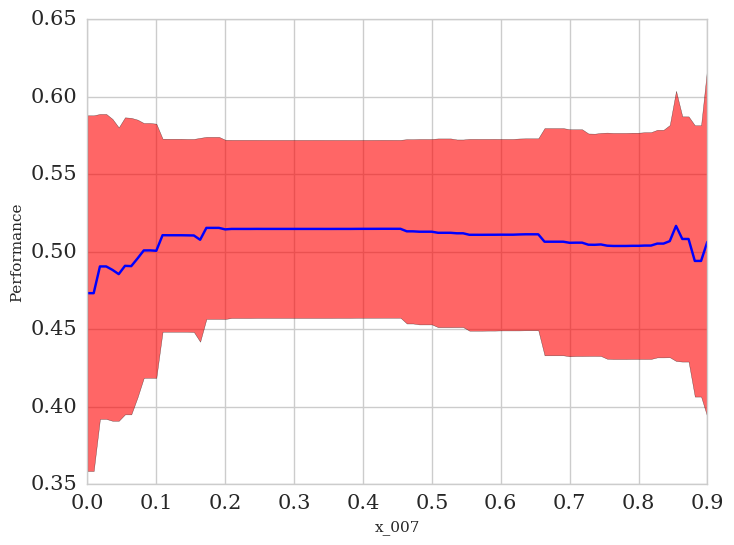

num_units_3


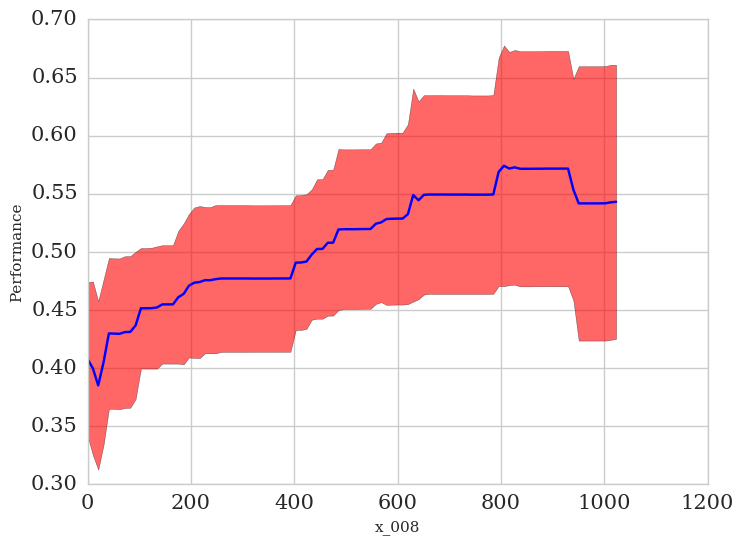

dropout_3


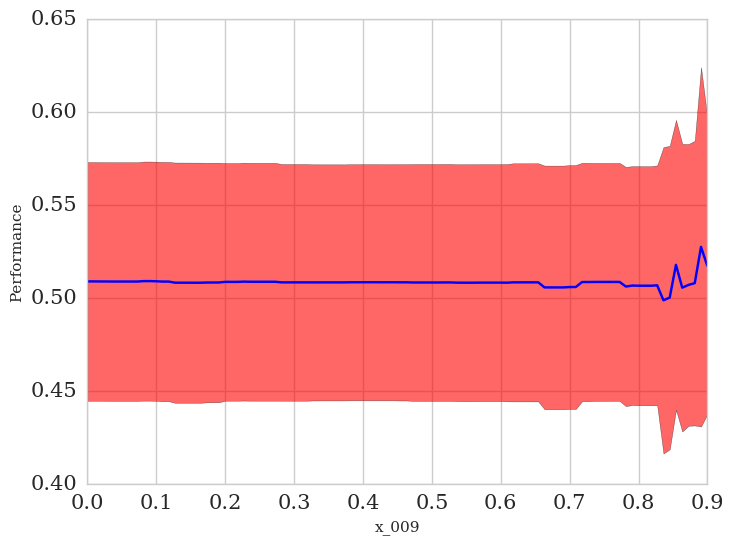

num_units_4


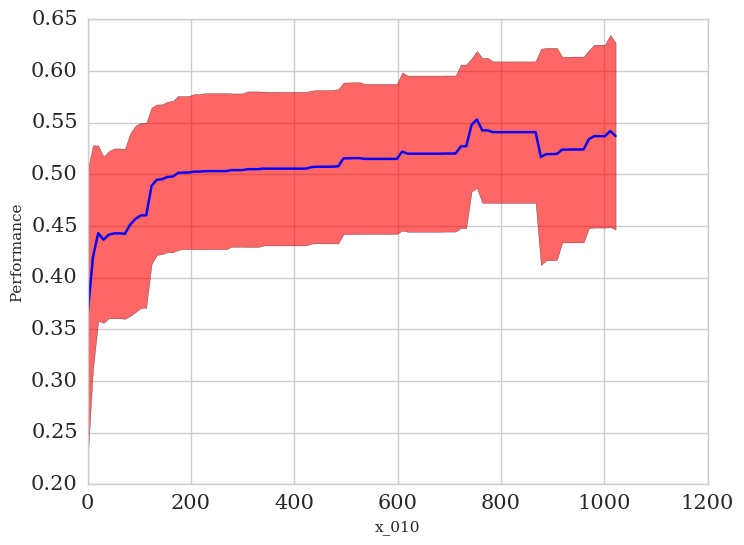

dropout_4


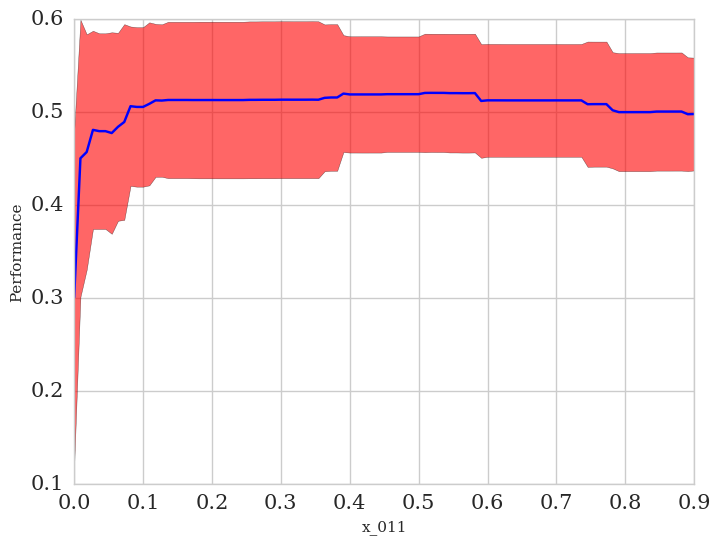

num_units_5


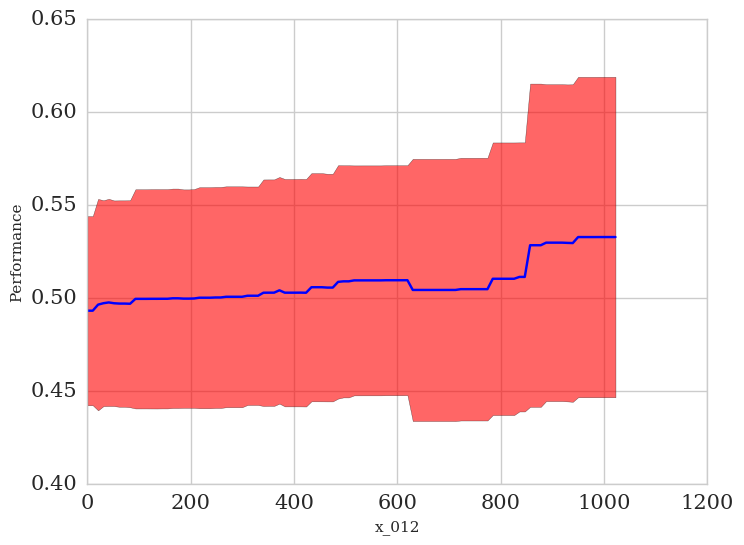

dropout_5


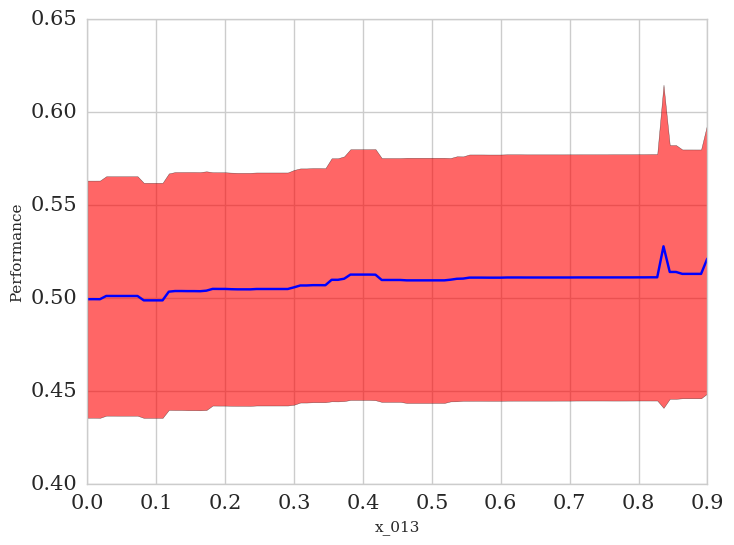

In [7]:
f = fANOVA(X, y)

# cs = CS.ConfigurationSpace(42)
        
# HPs = [\
#         CS.UniformFloatHyperparameter("initial_lr", lower=1e-6, upper=1e-2, default=1e-3, log=True),
#         CS.UniformFloatHyperparameter("final_lr_fraction", lower=1e-4, upper=1., default=1e-2, log=True),
#         CS.UniformIntegerHyperparameter("batch_size", lower=8, upper=256, default=16, log=True),
#     ]

# [cs.add_hyperparameter(hp) for hp in HPs]

# n_units = CS.UniformIntegerHyperparameter("num_units_1",
#                                           lower=8,
#                                           upper=1024,
#                                           default=64,
#                                           log=True)

# cs.add_hyperparameter(n_units)
# dropout = CS.UniformFloatHyperparameter("dropout_1",
#                                         lower=0.0,
#                                         upper=0.9,
#                                         default=0.1)
# cs.add_hyperparameter(dropout)

# n_units = CS.UniformIntegerHyperparameter("num_units_2",
#                                           lower=8,
#                                           upper=1024,
#                                           default=64,
#                                           log=True)

# cs.add_hyperparameter(n_units)
# dropout = CS.UniformFloatHyperparameter("dropout_2",
#                                         lower=0.0,
#                                         upper=0.9,
#                                         default=0.1)
# cs.add_hyperparameter(dropout)

vis = visualizer.Visualizer(f, f.cs)

for i in range(len(order)):
    print(order[i])
    vis.plot_marginal(i)

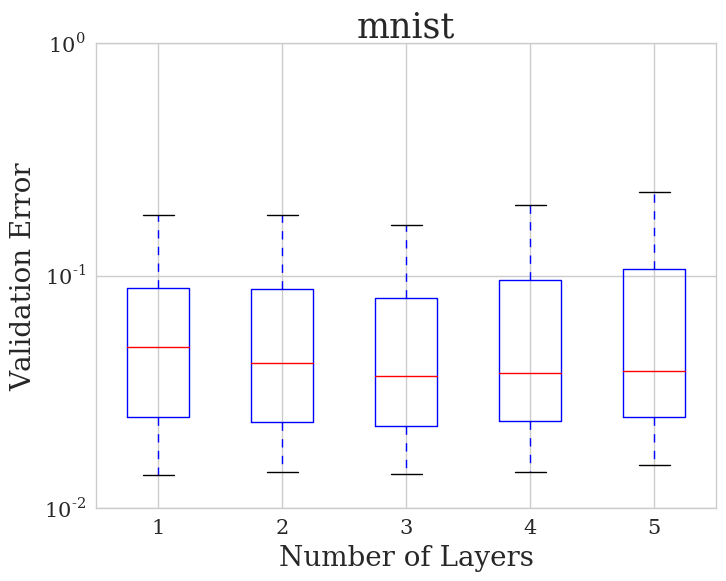

In [8]:
boxes = []
for i in range(1, 6):
    idx = np.where(X[:, 3] == i)[0]
    boxes.append(y[idx])

plt.boxplot(boxes )
plt.ylabel("Validation Error", fontsize=20)
plt.xlabel("Number of Layers", fontsize=20)
plt.yscale("log")
plt.title(dataset, fontsize=25)


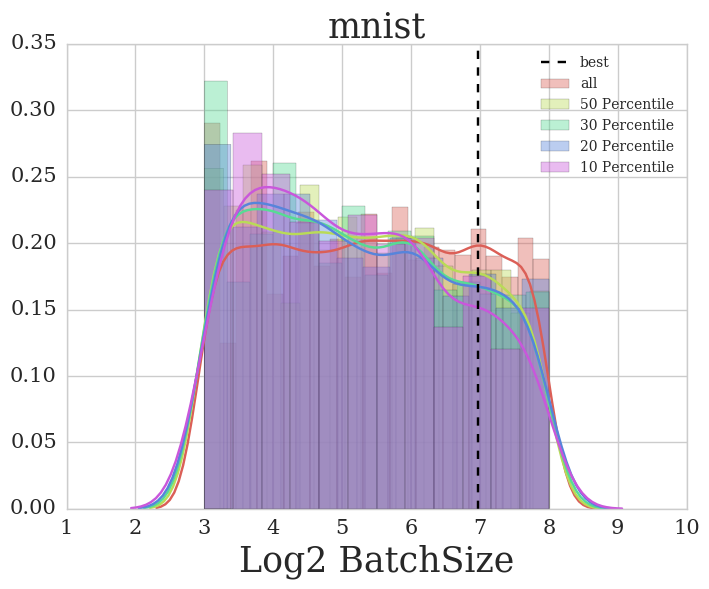

In [9]:
current_palette_7 = seaborn.color_palette("hls", 5)
seaborn.set_palette(current_palette_7)

seaborn.distplot(np.log2(X[:, 2]), label='all', norm_hist=True)

p = np.percentile(y, 50)
perc_50 = np.where(y < p)
seaborn.distplot(np.log2(X[perc_50, 2]), label='50 Percentile', norm_hist=True)

p = np.percentile(y, 30)
perc_30 = np.where(y < p)
seaborn.distplot(np.log2(X[perc_30, 2]), label='30 Percentile', norm_hist=True)

p = np.percentile(y, 20)
perc_20 = np.where(y < p)
seaborn.distplot(np.log2(X[perc_20, 2]), label='20 Percentile', norm_hist=True)

p = np.percentile(y, 10)
perc_10 = np.where(y < p)
seaborn.distplot(np.log2(X[perc_10, 2]), label='10 Percentile', norm_hist=True)

idx = np.argmin(y)
plt.axvline(np.log2(X[idx, 2]), linestyle="--", color="black", label="best")

plt.title(dataset, fontsize=25)
plt.xlabel('Log2 BatchSize', size=25)
plt.legend()
plt.show()

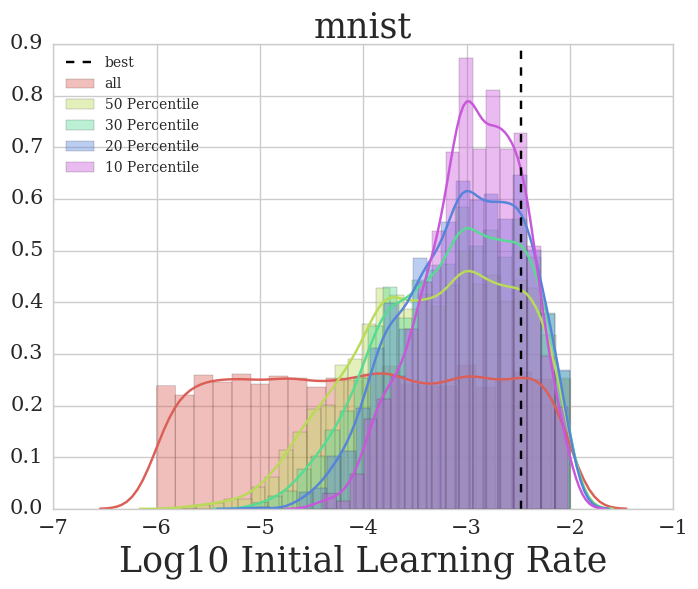

In [10]:
current_palette_7 = seaborn.color_palette("hls", 5)
seaborn.set_palette(current_palette_7)

seaborn.distplot(np.log10(X[:, 0]), label='all', norm_hist=True)

p = np.percentile(y, 50)
perc_50 = np.where(y < p)
seaborn.distplot(np.log10(X[perc_50, 0]), label='50 Percentile', norm_hist=True)

p = np.percentile(y, 30)
perc_30 = np.where(y < p)
seaborn.distplot(np.log10(X[perc_30, 0]), label='30 Percentile', norm_hist=True)

p = np.percentile(y, 20)
perc_20 = np.where(y < p)
seaborn.distplot(np.log10(X[perc_20, 0]), label='20 Percentile', norm_hist=True)

p = np.percentile(y, 10)
perc_10 = np.where(y < p)
seaborn.distplot(np.log10(X[perc_10, 0]), label='10 Percentile', norm_hist=True)


idx = np.argmin(y)
plt.axvline(np.log10(X[idx, 0]), linestyle="--", color="black", label="best")

plt.title(dataset, fontsize=25)
plt.xlabel('Log10 Initial Learning Rate', size=25)
plt.legend(loc=2)
plt.show()

# Reparameterization

In [326]:
dataset = "mnist"
order = ["initial_lr", "batch_size", "average_units_per_layer", "final_lr_fraction", "shape_parameter_1", "num_layers", "dropout_0", "dropout_1"]
         
X = []

for c in results["reparameterization"][dataset]["configs"]:
    vec = []
    for j, k in enumerate(order):
        if c[k] is not None:
            vec.append(c[k])
        else:
            vec.append(0)
    X.append(vec)
X = np.array(X)
y = results["reparameterization"][dataset]["validation_error"]

initial_lr


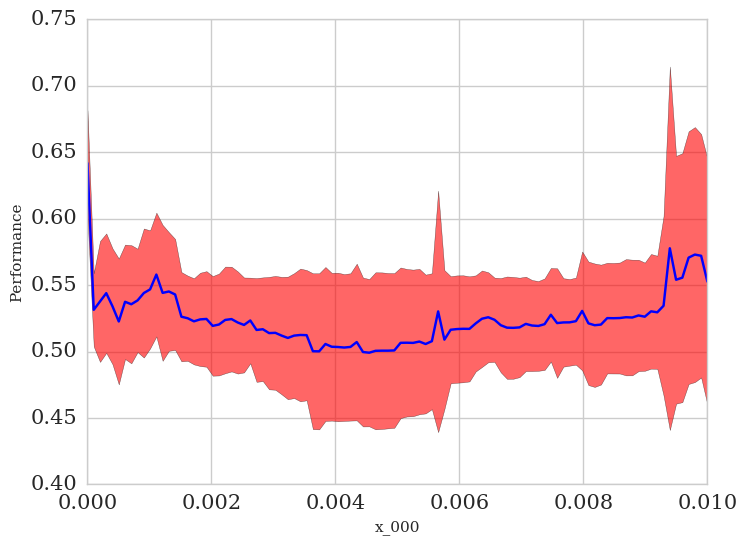

batch_size


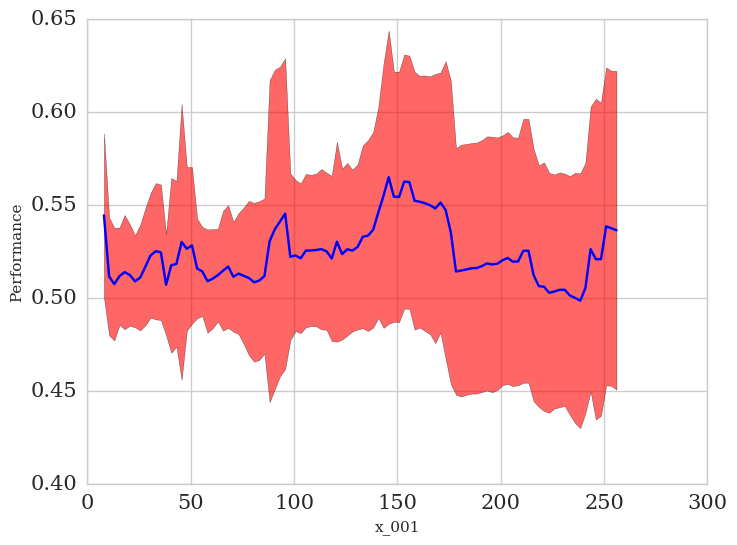

average_units_per_layer


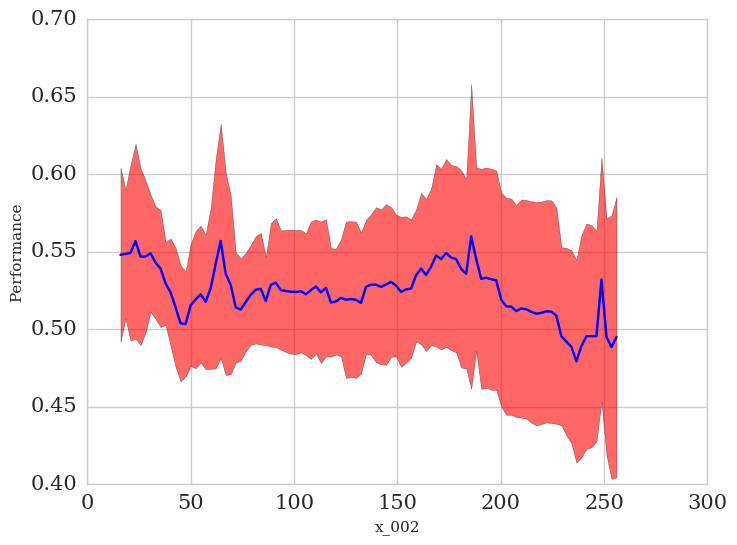

final_lr_fraction


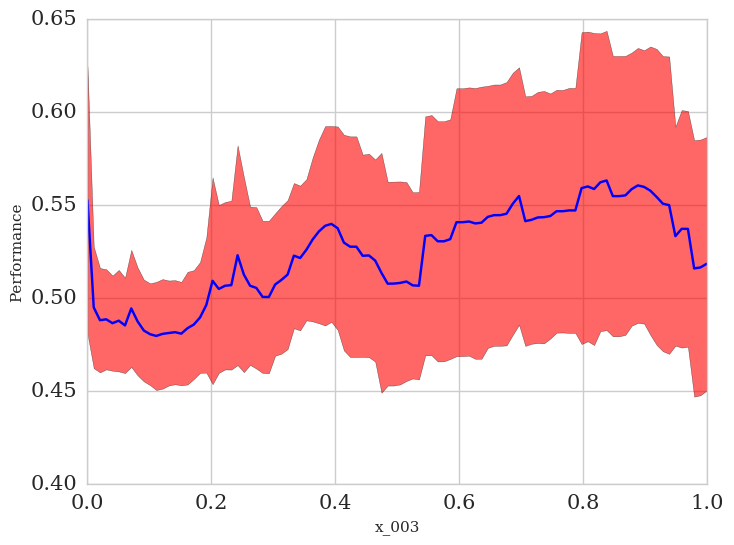

shape_parameter_1


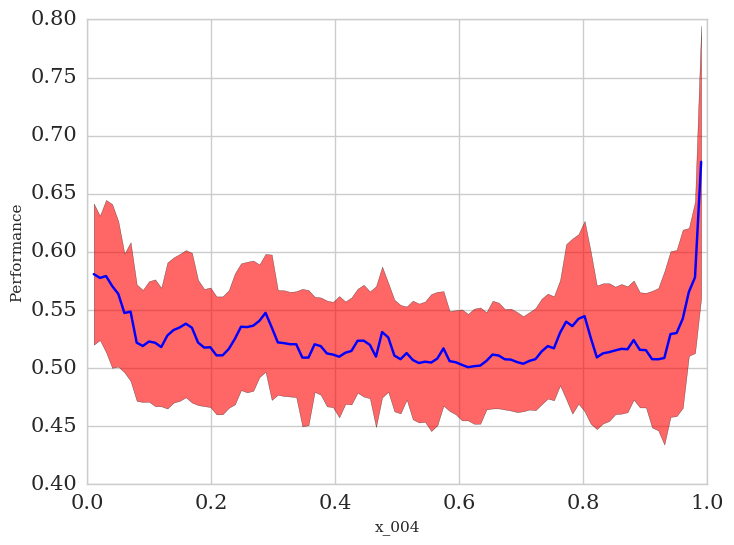

num_layers


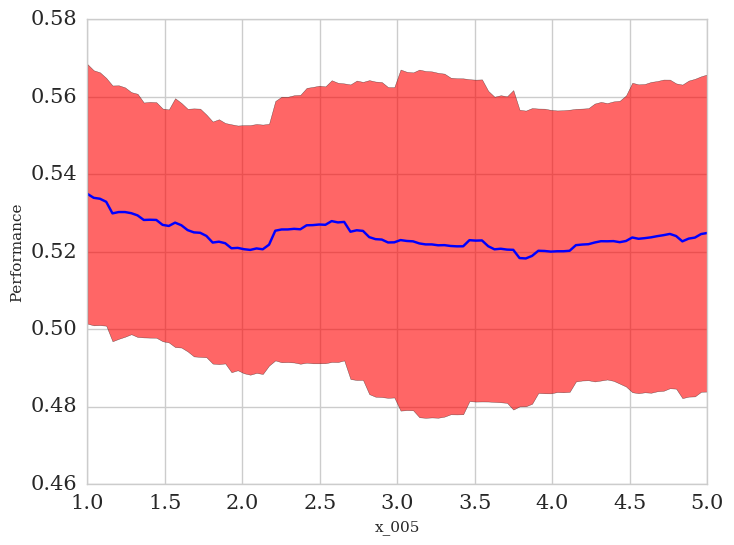

dropout_0


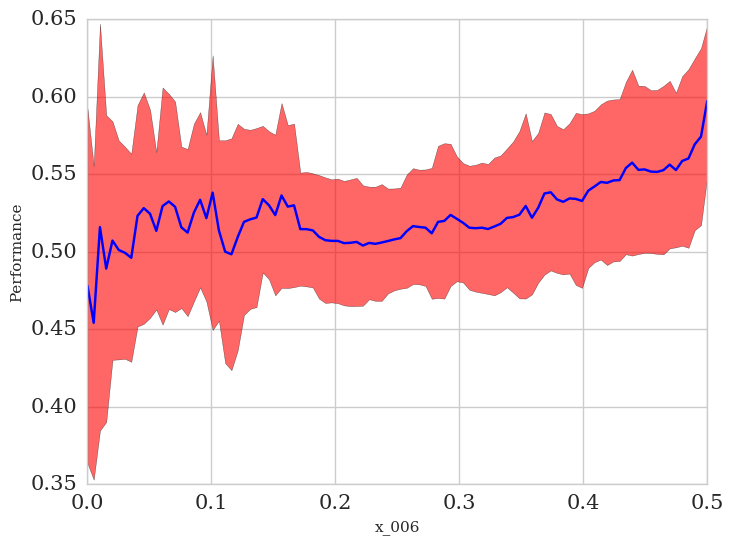

dropout_1


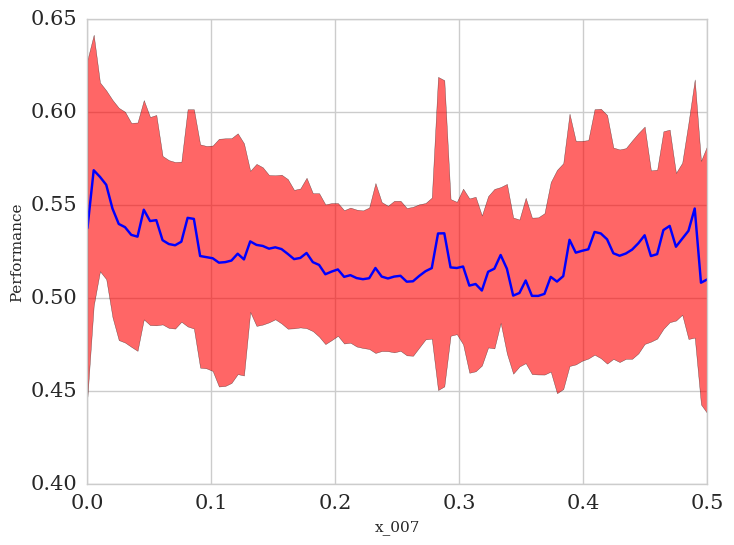

In [125]:
f = fANOVA(X, y)

vis = visualizer.Visualizer(f, f.cs)

for i in range(len(order)):
    print(order[i])
    vis.plot_marginal(i)

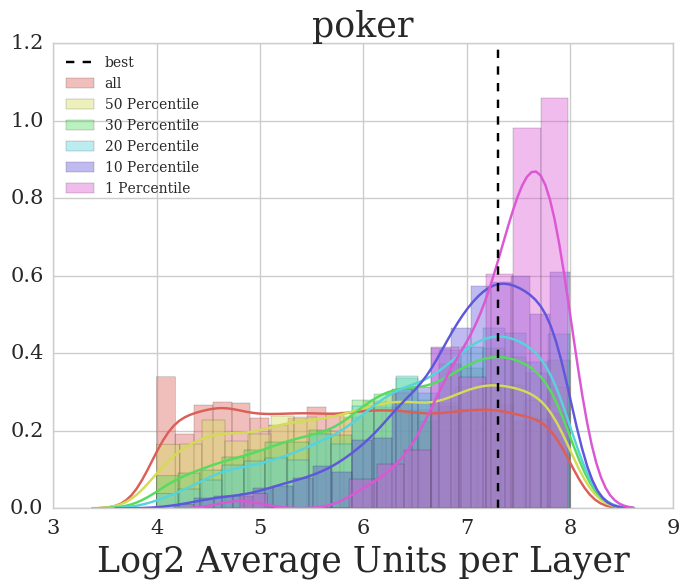

In [95]:
current_palette_7 = seaborn.color_palette("hls", 6)
seaborn.set_palette(current_palette_7)

seaborn.distplot(np.log2(X[:, 2]), label='all', norm_hist=True)

p = np.percentile(y, 50)
perc_50 = np.where(y < p)
seaborn.distplot(np.log2(X[perc_50, 2]), label='50 Percentile', norm_hist=True)

p = np.percentile(y, 30)
perc_30 = np.where(y < p)
seaborn.distplot(np.log2(X[perc_30, 2]), label='30 Percentile', norm_hist=True)

p = np.percentile(y, 20)
perc_20 = np.where(y < p)
seaborn.distplot(np.log2(X[perc_20, 2]), label='20 Percentile', norm_hist=True)

p = np.percentile(y, 10)
perc_10 = np.where(y < p)
seaborn.distplot(np.log2(X[perc_10, 2]), label='10 Percentile', norm_hist=True)

p = np.percentile(y, 1)
perc_1 = np.where(y < p)
seaborn.distplot(np.log2(X[perc_1, 2]), label='1 Percentile', norm_hist=True)

idx = np.argmin(y)
plt.axvline(np.log2(X[idx, 2]), linestyle="--", color="black", label="best")

plt.title(dataset, fontsize=25)
plt.xlabel('Log2 Average Units per Layer', size=25)
plt.legend(loc=2)
plt.savefig("/mhome/kleinaa/experiments/architecture_search/plots/%s_reparam_avg_units.png" % dataset, bbox_inches='tight')
plt.show()

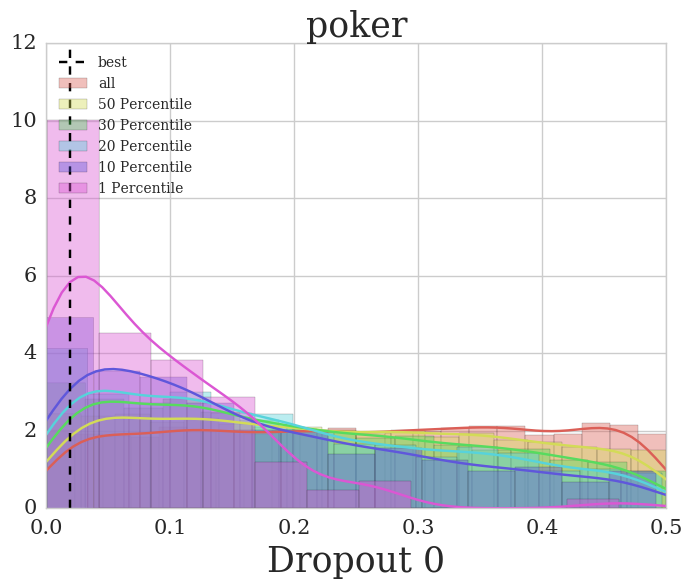

In [86]:
current_palette_7 = seaborn.color_palette("hls", 6)
seaborn.set_palette(current_palette_7)

seaborn.distplot(X[:, 6], label='all', norm_hist=True)

p = np.percentile(y, 50)
perc_50 = np.where(y < p)
seaborn.distplot(X[perc_50, 6], label='50 Percentile', norm_hist=True)

p = np.percentile(y, 30)
perc_30 = np.where(y < p)
seaborn.distplot(X[perc_30, 6], label='30 Percentile', norm_hist=True)

p = np.percentile(y, 20)
perc_20 = np.where(y < p)
seaborn.distplot(X[perc_20, 6], label='20 Percentile', norm_hist=True)

p = np.percentile(y, 10)
perc_10 = np.where(y < p)
seaborn.distplot(X[perc_10, 6], label='10 Percentile', norm_hist=True)

p = np.percentile(y, 1)
perc_1 = np.where(y < p)
seaborn.distplot(X[perc_1, 6], label='1 Percentile', norm_hist=True)


idx = np.argmin(y)
plt.axvline(X[idx, 6], linestyle="--", color="black", label="best")

plt.title(dataset, fontsize=25)
plt.xlabel('Dropout 0', size=25)
plt.legend(loc=2)
plt.xlim(0, .5)
plt.savefig("/mhome/kleinaa/experiments/architecture_search/plots/%s_reparam_dropout_0.png" % dataset, bbox_inches='tight')
plt.show()

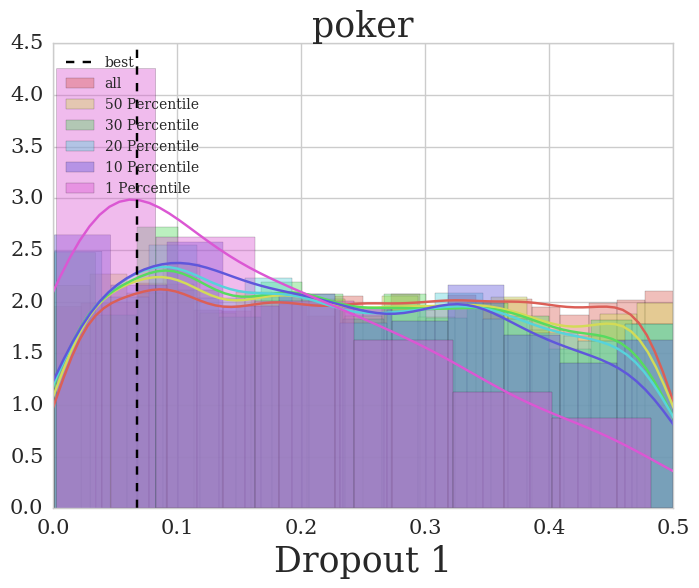

In [87]:
current_palette_7 = seaborn.color_palette("hls", 6)
seaborn.set_palette(current_palette_7)

seaborn.distplot(X[:, 7], label='all', norm_hist=True)

p = np.percentile(y, 50)
perc_50 = np.where(y < p)
seaborn.distplot(X[perc_50, 7], label='50 Percentile', norm_hist=True)

p = np.percentile(y, 30)
perc_30 = np.where(y < p)
seaborn.distplot(X[perc_30, 7], label='30 Percentile', norm_hist=True)

p = np.percentile(y, 20)
perc_20 = np.where(y < p)
seaborn.distplot(X[perc_20, 7], label='20 Percentile', norm_hist=True)

p = np.percentile(y, 10)
perc_10 = np.where(y < p)
seaborn.distplot(X[perc_10, 7], label='10 Percentile', norm_hist=True)

p = np.percentile(y, 1)
perc_1 = np.where(y < p)
seaborn.distplot(X[perc_1, 7], label='1 Percentile', norm_hist=True)

idx = np.argmin(y)
plt.axvline(X[idx, 7], linestyle="--", color="black", label="best")

plt.title(dataset, fontsize=25)
plt.xlabel('Dropout 1', size=25)
plt.legend(loc=2)
plt.xlim(0, .5)
plt.savefig("/mhome/kleinaa/experiments/architecture_search/plots/%s_reparam_dropout_1.png" % dataset, bbox_inches='tight')

plt.show()

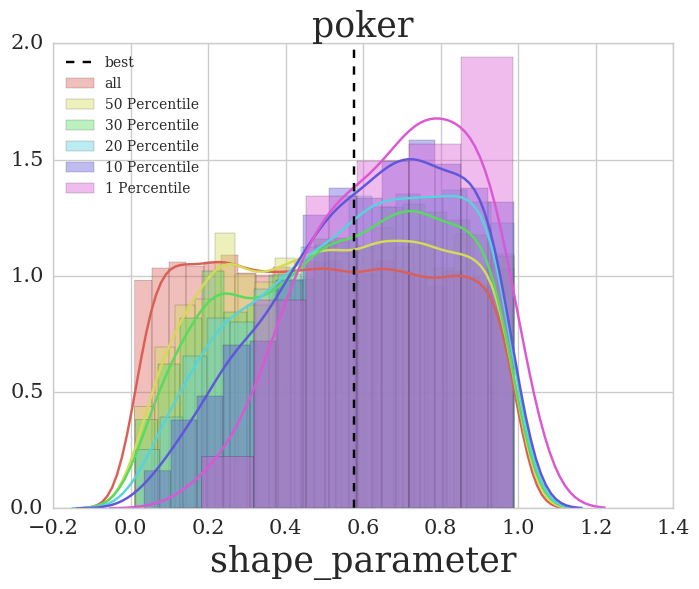

In [88]:
current_palette_7 = seaborn.color_palette("hls", 6)
seaborn.set_palette(current_palette_7)

seaborn.distplot(X[:, 4], label='all', norm_hist=True)

p = np.percentile(y, 50)
perc_50 = np.where(y < p)
seaborn.distplot(X[perc_50, 4], label='50 Percentile', norm_hist=True)

p = np.percentile(y, 30)
perc_30 = np.where(y < p)
seaborn.distplot(X[perc_30, 4], label='30 Percentile', norm_hist=True)

p = np.percentile(y, 20)
perc_20 = np.where(y < p)
seaborn.distplot(X[perc_20, 4], label='20 Percentile', norm_hist=True)

p = np.percentile(y, 10)
perc_10 = np.where(y < p)
seaborn.distplot(X[perc_10, 4], label='10 Percentile', norm_hist=True)

p = np.percentile(y, 1)
perc_1 = np.where(y < p)
seaborn.distplot(X[perc_1, 4], label='1 Percentile', norm_hist=True)

idx = np.argmin(y)
plt.axvline(X[idx, 4], linestyle="--", color="black", label="best")

plt.title(dataset, fontsize=25)
plt.xlabel('shape_parameter', size=25)
plt.legend(loc=2)
plt.savefig("/mhome/kleinaa/experiments/architecture_search/plots/%s_reparam_shape_parameter.png" % dataset, bbox_inches='tight')

plt.show()

/home/kleinaa/virtualenv/local/lib/python3.5/site-packages/matplotlib/scale.py:101: RuntimeWarning: invalid value encountered in less_equal
  a[a <= 0.0] = 1e-300


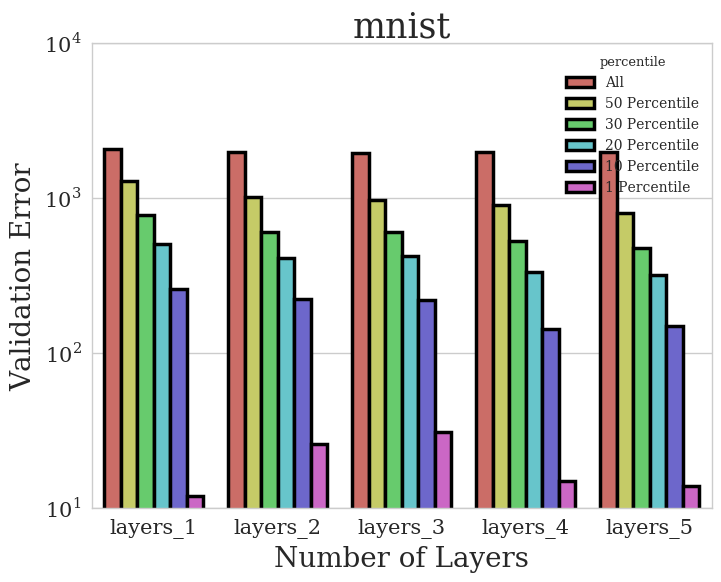

In [237]:
# boxes = []
# for i in range(1, 6):
#     idx = np.where(X[:, 5] == i)[0]
#     boxes.append(y[idx])

data = []
for i in range(1, 6):
    idx = np.where(X[:, 5] == i)[0]
    data.append([len(y[idx]), "layers_%d" % i, "All"])                
        
    p = np.percentile(y, 50)
    perc_50 = np.where(y < p)
    X_perc = X[perc_50]
    y_perc = y[perc_50]
    idx = np.where(X_perc[:, 5] == i)[0]
    data.append([len(y_perc[idx]), "layers_%d" % i, "50 Percentile"])                
        
    p = np.percentile(y, 30)
    perc_30 = np.where(y < p)
    X_perc = X[perc_30]
    y_perc = y[perc_30]
    idx = np.where(X_perc[:, 5] == i)[0]
    data.append([len(y_perc[idx]), "layers_%d" % i, "30 Percentile"])                
        
    p = np.percentile(y, 20)
    perc_20 = np.where(y < p)
    X_perc = X[perc_20]
    y_perc = y[perc_20]
    idx = np.where(X_perc[:, 5] == i)[0]
    data.append([len(y_perc[idx]), "layers_%d" % i, "20 Percentile"])                
        
    p = np.percentile(y, 10)
    perc_10 = np.where(y < p)
    X_perc = X[perc_10]
    y_perc = y[perc_10]
    idx = np.where(X_perc[:, 5] == i)[0]
    data.append([len(y_perc[idx]), "layers_%d" % i, "10 Percentile"])                

    p = np.percentile(y, 1)
    perc_1 = np.where(y < p)
    X_perc = X[perc_1]
    y_perc = y[perc_1]
    idx = np.where(X_perc[:, 5] == i)[0]
    data.append([len(y_perc[idx]), "layers_%d" % i, "1 Percentile"])                

frame = DataFrame(data, columns=["num_points", "num_layers", "percentile"])
seaborn.barplot(x="num_layers", y="num_points", hue="percentile", data=frame, linewidth=2.5, palette=current_palette_7)

plt.ylabel("Validation Error", fontsize=20)
plt.xlabel("Number of Layers", fontsize=20)
plt.yscale("log")
plt.title(dataset, fontsize=25)
plt.savefig("/mhome/kleinaa/experiments/architecture_search/plots_reparameterization/%s_reparam_num_layers.png" % dataset, bbox_inches='tight')


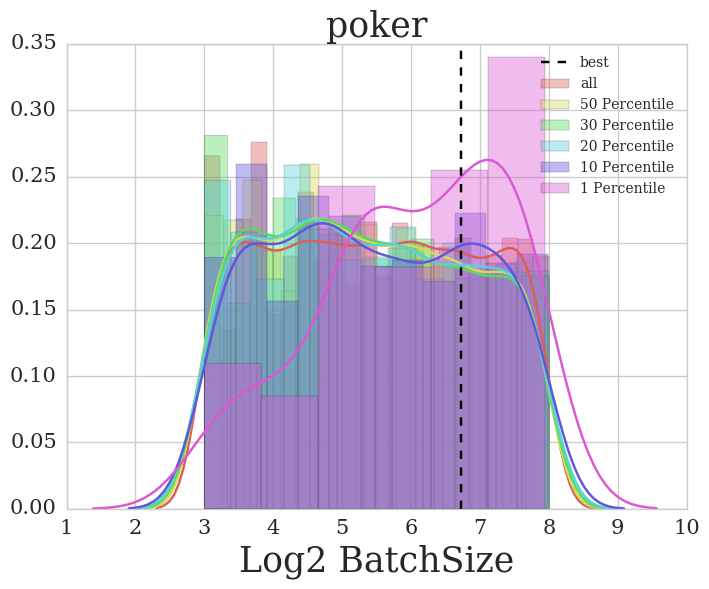

In [90]:
current_palette_7 = seaborn.color_palette("hls", 6)
seaborn.set_palette(current_palette_7)

seaborn.distplot(np.log2(X[:, 1]), label='all', norm_hist=True)

p = np.percentile(y, 50)
perc_50 = np.where(y < p)
seaborn.distplot(np.log2(X[perc_50, 1]), label='50 Percentile', norm_hist=True)

p = np.percentile(y, 30)
perc_30 = np.where(y < p)
seaborn.distplot(np.log2(X[perc_30, 1]), label='30 Percentile', norm_hist=True)

p = np.percentile(y, 20)
perc_20 = np.where(y < p)
seaborn.distplot(np.log2(X[perc_20, 1]), label='20 Percentile', norm_hist=True)

p = np.percentile(y, 10)
perc_10 = np.where(y < p)
seaborn.distplot(np.log2(X[perc_10, 1]), label='10 Percentile', norm_hist=True)

p = np.percentile(y, 1)
perc_1 = np.where(y < p)
seaborn.distplot(np.log2(X[perc_1, 1]), label='1 Percentile', norm_hist=True)

idx = np.argmin(y)
plt.axvline(np.log2(X[idx, 1]), linestyle="--", color="black", label="best")

plt.title(dataset, fontsize=25)
plt.xlabel('Log2 BatchSize', size=25)
plt.legend()
plt.savefig("/mhome/kleinaa/experiments/architecture_search/plots/%s_reparam_batch_size.png" % dataset, bbox_inches='tight')

plt.show()

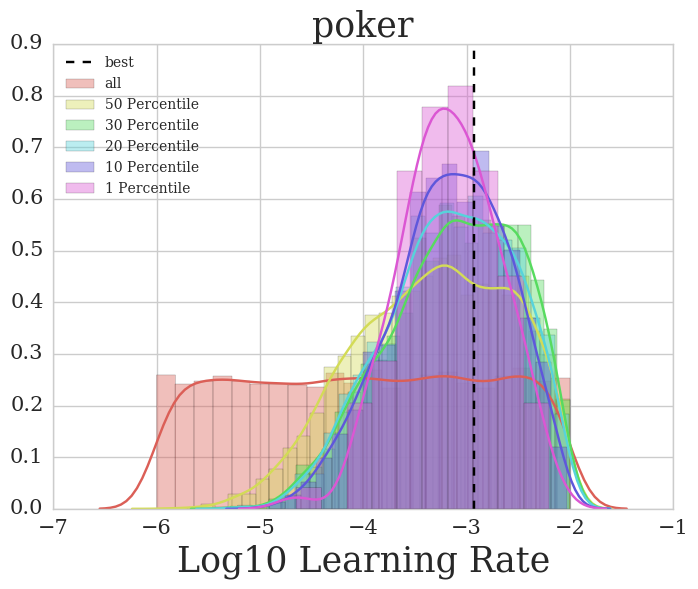

In [91]:
current_palette_7 = seaborn.color_palette("hls", 6)
seaborn.set_palette(current_palette_7)

seaborn.distplot(np.log10(X[:, 0]), label='all', norm_hist=True)

p = np.percentile(y, 50)
perc_50 = np.where(y < p)
seaborn.distplot(np.log10(X[perc_50, 0]), label='50 Percentile', norm_hist=True)

p = np.percentile(y, 30)
perc_30 = np.where(y < p)
seaborn.distplot(np.log10(X[perc_30, 0]), label='30 Percentile', norm_hist=True)

p = np.percentile(y, 20)
perc_20 = np.where(y < p)
seaborn.distplot(np.log10(X[perc_20, 0]), label='20 Percentile', norm_hist=True)

p = np.percentile(y, 10)
perc_10 = np.where(y < p)
seaborn.distplot(np.log10(X[perc_10, 0]), label='10 Percentile', norm_hist=True)

p = np.percentile(y, 1)
perc_1 = np.where(y < p)
seaborn.distplot(np.log10(X[perc_1, 0]), label='1 Percentile', norm_hist=True)

idx = np.argmin(y)
plt.axvline(np.log10(X[idx, 0]), linestyle="--", color="black", label="best")

plt.title(dataset, fontsize=25)
plt.xlabel('Log10 Learning Rate', size=25)
plt.legend(loc=2)
plt.savefig("/mhome/kleinaa/experiments/architecture_search/plots/%s_reparam_learning_rate.png" % dataset, bbox_inches='tight')

plt.show()

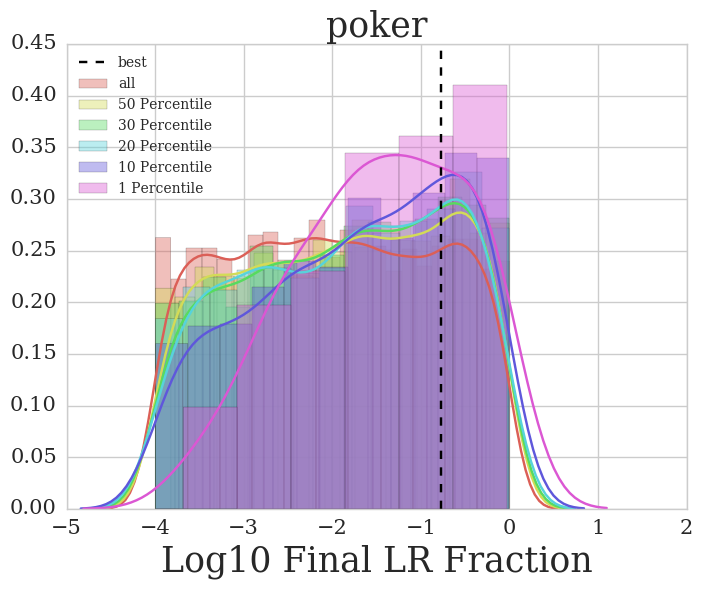

In [92]:
current_palette_7 = seaborn.color_palette("hls", 6)
seaborn.set_palette(current_palette_7)

seaborn.distplot(np.log10(X[:, 3]), label='all', norm_hist=True)

p = np.percentile(y, 50)
perc_50 = np.where(y < p)
seaborn.distplot(np.log10(X[perc_50, 3]), label='50 Percentile', norm_hist=True)

p = np.percentile(y, 30)
perc_30 = np.where(y < p)
seaborn.distplot(np.log10(X[perc_30, 3]), label='30 Percentile', norm_hist=True)

p = np.percentile(y, 20)
perc_20 = np.where(y < p)
seaborn.distplot(np.log10(X[perc_20, 3]), label='20 Percentile', norm_hist=True)

p = np.percentile(y, 10)
perc_10 = np.where(y < p)
seaborn.distplot(np.log10(X[perc_10, 3]), label='10 Percentile', norm_hist=True)

p = np.percentile(y, 1)
perc_1 = np.where(y < p)
seaborn.distplot(np.log10(X[perc_1, 3]), label='1 Percentile', norm_hist=True)

idx = np.argmin(y)
plt.axvline(np.log10(X[idx, 3]), linestyle="--", color="black", label="best")

plt.title(dataset, fontsize=25)
plt.xlabel('Log10 Final LR Fraction', size=25)
plt.legend(loc=2)
plt.savefig("/mhome/kleinaa/experiments/architecture_search/plots/%s_reparam_final_lr_fraction.png" % dataset, bbox_inches='tight')

plt.show()

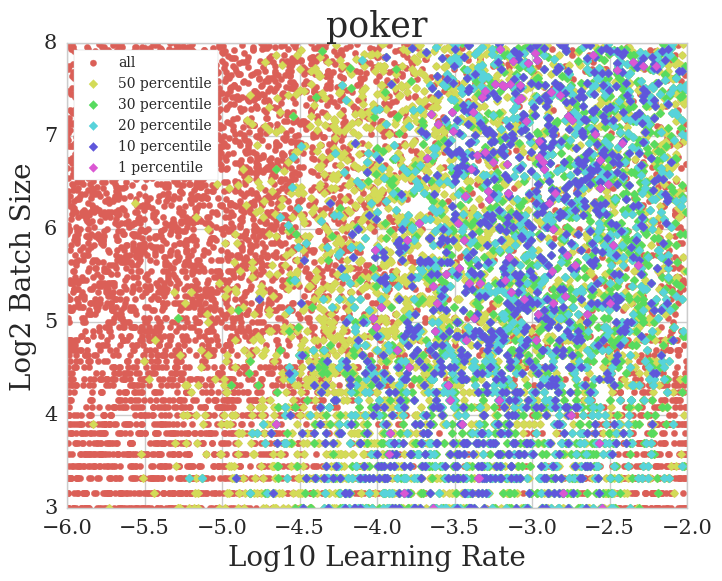

In [93]:
current_palette_7 = seaborn.color_palette("hls", 6)
seaborn.set_palette(current_palette_7)

plt.scatter(np.log10(X[:, 0]), np.log2(X[:, 1]), color=current_palette_7[0], label="all")

#top_100 = np.argsort(y)[:100]
#plt.scatter(np.log10(X[top_100, 0]), np.log2(X[top_100, 1]), color="red", label="top 100", marker="D")

p = np.percentile(y, 50)
perc_50 = np.where(y < p)
plt.scatter(np.log10(X[perc_50, 0]), np.log2(X[perc_50, 1]), color=current_palette_7[1], label="50 percentile", marker="D")

p = np.percentile(y, 30)
perc_30 = np.where(y < p)
plt.scatter(np.log10(X[perc_30, 0]), np.log2(X[perc_30, 1]), color=current_palette_7[2], label="30 percentile", marker="D")

p = np.percentile(y, 20)
perc_20 = np.where(y < p)
plt.scatter(np.log10(X[perc_20, 0]), np.log2(X[perc_20, 1]), color=current_palette_7[3], label="20 percentile", marker="D")

p = np.percentile(y, 10)
perc_10 = np.where(y < p)
plt.scatter(np.log10(X[perc_10, 0]), np.log2(X[perc_10, 1]), color=current_palette_7[4], label="10 percentile", marker="D")

p = np.percentile(y, 1)
perc_1 = np.where(y < p)
plt.scatter(np.log10(X[perc_1, 0]), np.log2(X[perc_1, 1]), color=current_palette_7[5], label="1 percentile", marker="D")


plt.xlabel("Log10 Learning Rate", fontsize=20)
plt.ylabel("Log2 Batch Size", fontsize=20)
legend = plt.legend(frameon=True, fontsize=10, loc=2)
plt.xlim(-6, -2)
plt.ylim(3, 8)
plt.title(dataset, fontsize=25)

plt.savefig("/mhome/kleinaa/experiments/architecture_search/plots/%s_reparam_batch_size_and_lr.png" % dataset, bbox_inches='tight')

plt.show()

['initial_lr', 'batch_size', 'average_units_per_layer', 'final_lr_fraction', 'shape_parameter_1', 'num_layers', 'dropout_0', 'dropout_1']


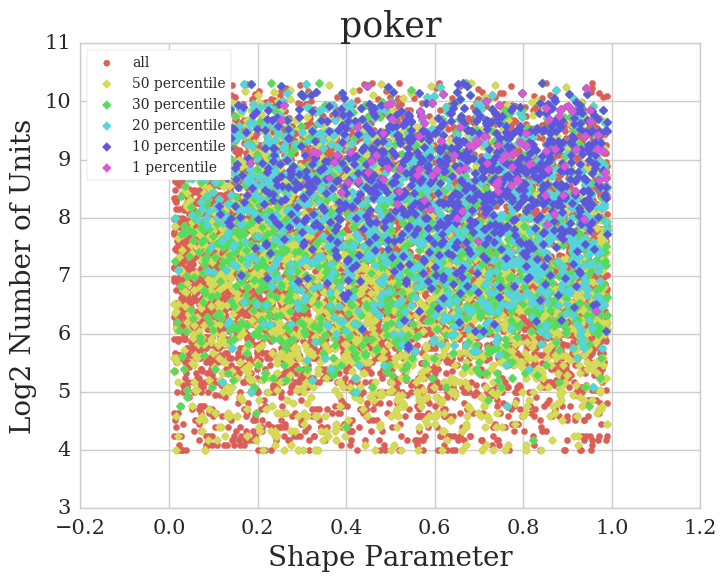

In [94]:
current_palette_7 = seaborn.color_palette("hls", 6)
seaborn.set_palette(current_palette_7)

plt.scatter(X[:, 4], np.log2(X[:, 2] * X[:, 5]), color=current_palette_7[0], label="all")

p = np.percentile(y, 50)
perc_50 = np.where(y < p)
plt.scatter(X[perc_50, 4], np.log2(X[perc_50, 2] * X[perc_50, 5]), color=current_palette_7[1], label="50 percentile", marker="D")

p = np.percentile(y, 30)
perc_30 = np.where(y < p)
plt.scatter(X[perc_30, 4], np.log2(X[perc_30, 2] * X[perc_30, 5]), color=current_palette_7[2], label="30 percentile", marker="D")

p = np.percentile(y, 20)
perc_20 = np.where(y < p)
plt.scatter(X[perc_20, 4], np.log2(X[perc_20, 2] * X[perc_20, 5]), color=current_palette_7[3], label="20 percentile", marker="D")

p = np.percentile(y, 10)
perc_10 = np.where(y < p)
plt.scatter(X[perc_10, 4], np.log2(X[perc_10, 2] * X[perc_10, 5]), color=current_palette_7[4], label="10 percentile", marker="D")

p = np.percentile(y, 1)
perc_1 = np.where(y < p)
plt.scatter(X[perc_1, 4], np.log2(X[perc_1, 2] * X[perc_1, 5]), color=current_palette_7[5], label="1 percentile", marker="D")

print(order)

plt.xlabel("Shape Parameter", fontsize=20)
plt.ylabel("Log2 Number of Units", fontsize=20)
legend = plt.legend(frameon=True, fontsize=10, loc=2)
#plt.xlim(-6, -2)
#plt.ylim(3, 8)
plt.title(dataset, fontsize=25)

plt.savefig("/mhome/kleinaa/experiments/architecture_search/plots/%s_reparam_num_units_and_shape.png" % dataset, bbox_inches='tight')

plt.show()

# Residual Networks

In [322]:
dataset = "letter"
order = ["num_stages", "batch_size", "momentum", "initial_lr", "final_lr_fraction",
         "num_blocks_1", "num_layers_1", "num_units_1", 
         "num_blocks_2", "num_layers_2", "num_units_2",
         "num_blocks_3", "num_layers_3", "num_units_3"]
X = []

for c in results["res_nets"][dataset]["configs"]:
    vec = []
    for j, k in enumerate(order):
        if c[k] is not None:
            vec.append(c[k])
        else:
            vec.append(0)
    X.append(vec)
X = np.array(X)
print(X.shape)
y = results["res_nets"][dataset]["validation_error"]

(2000, 14)


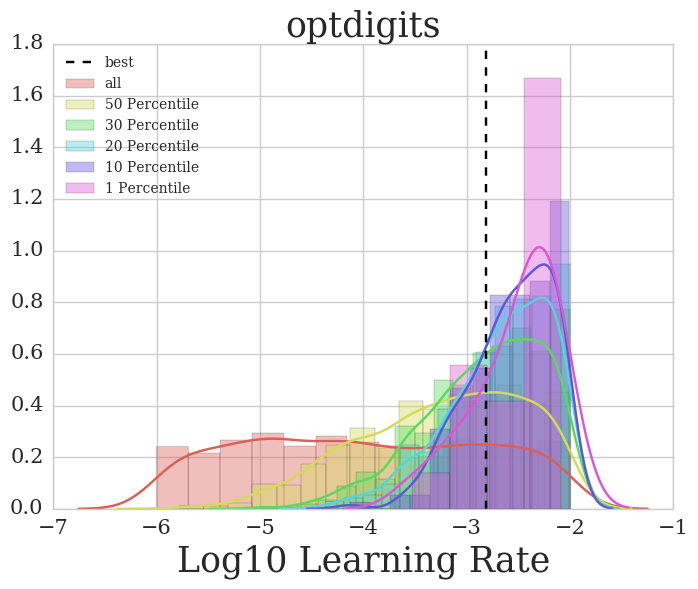

In [192]:
current_palette_7 = seaborn.color_palette("hls", 6)
seaborn.set_palette(current_palette_7)

seaborn.distplot(np.log10(X[:, 3]), label='all', norm_hist=True)

p = np.percentile(y, 50)
perc_50 = np.where(y < p)
seaborn.distplot(np.log10(X[perc_50, 3]), label='50 Percentile', norm_hist=True)

p = np.percentile(y, 30)
perc_30 = np.where(y < p)
seaborn.distplot(np.log10(X[perc_30, 3]), label='30 Percentile', norm_hist=True)

p = np.percentile(y, 20)
perc_20 = np.where(y < p)
seaborn.distplot(np.log10(X[perc_20, 3]), label='20 Percentile', norm_hist=True)

p = np.percentile(y, 10)
perc_10 = np.where(y < p)
seaborn.distplot(np.log10(X[perc_10, 3]), label='10 Percentile', norm_hist=True)

p = np.percentile(y, 1)
perc_1 = np.where(y < p)
seaborn.distplot(np.log10(X[perc_1, 3]), label='1 Percentile', norm_hist=True)

idx = np.argmin(y)
plt.axvline(np.log10(X[idx, 3]), linestyle="--", color="black", label="best")

plt.title(dataset, fontsize=25)
plt.xlabel('Log10 Learning Rate', size=25)
plt.legend(loc=2)
plt.savefig("/mhome/kleinaa/experiments/architecture_search/plots_res_nets/%s_res_nets_learning_rate.png" % dataset, bbox_inches='tight')

plt.show()

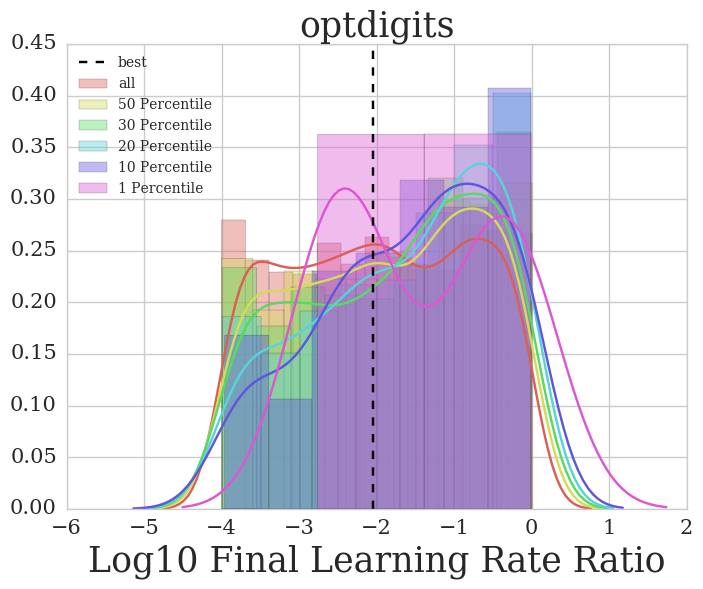

In [193]:
current_palette_7 = seaborn.color_palette("hls", 6)
seaborn.set_palette(current_palette_7)

seaborn.distplot(np.log10(X[:, 4]), label='all', norm_hist=True)

p = np.percentile(y, 50)
perc_50 = np.where(y < p)
seaborn.distplot(np.log10(X[perc_50, 4]), label='50 Percentile', norm_hist=True)

p = np.percentile(y, 30)
perc_30 = np.where(y < p)
seaborn.distplot(np.log10(X[perc_30, 4]), label='30 Percentile', norm_hist=True)

p = np.percentile(y, 20)
perc_20 = np.where(y < p)
seaborn.distplot(np.log10(X[perc_20, 4]), label='20 Percentile', norm_hist=True)

p = np.percentile(y, 10)
perc_10 = np.where(y < p)
seaborn.distplot(np.log10(X[perc_10, 4]), label='10 Percentile', norm_hist=True)

p = np.percentile(y, 1)
perc_1 = np.where(y < p)
seaborn.distplot(np.log10(X[perc_1, 4]), label='1 Percentile', norm_hist=True)

idx = np.argmin(y)
plt.axvline(np.log10(X[idx, 4]), linestyle="--", color="black", label="best")

plt.title(dataset, fontsize=25)
plt.xlabel('Log10 Final Learning Rate Ratio', size=25)
plt.legend(loc=2)

plt.savefig("/mhome/kleinaa/experiments/architecture_search/plots_res_nets/%s_res_nets_final_learning_rate.png" % dataset, bbox_inches='tight')


plt.show()

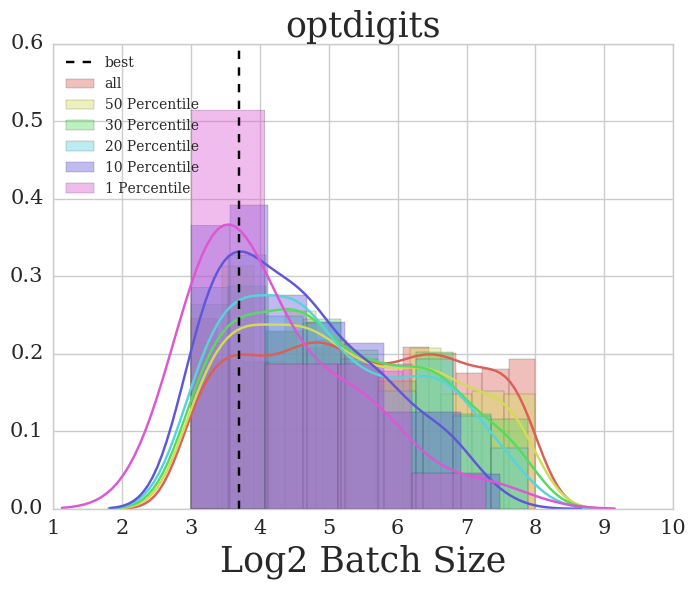

In [195]:
current_palette_7 = seaborn.color_palette("hls", 6)
seaborn.set_palette(current_palette_7)

seaborn.distplot(np.log2(X[:, 1]), label='all', norm_hist=True)

p = np.percentile(y, 50)
perc_50 = np.where(y < p)
seaborn.distplot(np.log2(X[perc_50, 1]), label='50 Percentile', norm_hist=True)

p = np.percentile(y, 30)
perc_30 = np.where(y < p)
seaborn.distplot(np.log2(X[perc_30, 1]), label='30 Percentile', norm_hist=True)

p = np.percentile(y, 20)
perc_20 = np.where(y < p)
seaborn.distplot(np.log2(X[perc_20, 1]), label='20 Percentile', norm_hist=True)

p = np.percentile(y, 10)
perc_10 = np.where(y < p)
seaborn.distplot(np.log2(X[perc_10, 1]), label='10 Percentile', norm_hist=True)

p = np.percentile(y, 1)
perc_1 = np.where(y < p)
seaborn.distplot(np.log2(X[perc_1, 1]), label='1 Percentile', norm_hist=True)

idx = np.argmin(y)
plt.axvline(np.log2(X[idx, 1]), linestyle="--", color="black", label="best")

plt.title(dataset, fontsize=25)
plt.xlabel('Log2 Batch Size', size=25)
plt.legend(loc=2)
plt.savefig("/mhome/kleinaa/experiments/architecture_search/plots_res_nets/%s_res_nets_batch_size.png" % dataset, bbox_inches='tight')


plt.show()

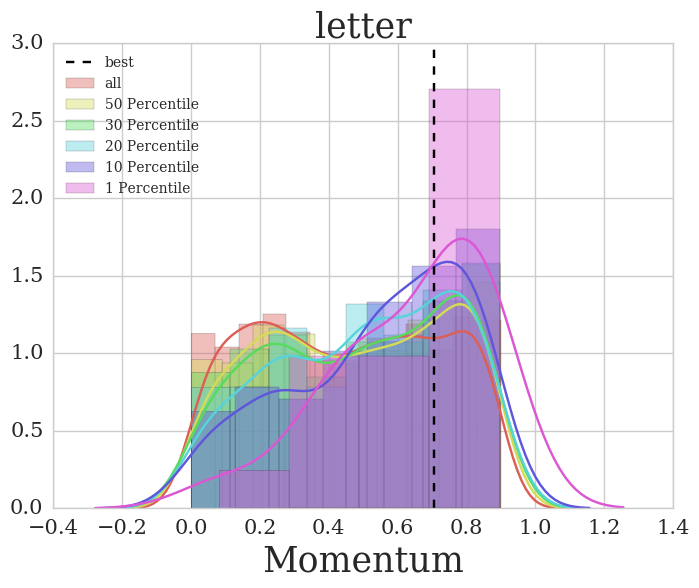

In [323]:
current_palette_7 = seaborn.color_palette("hls", 6)
seaborn.set_palette(current_palette_7)

seaborn.distplot(X[:, 2], label='all', norm_hist=True)

p = np.percentile(y, 50)
perc_50 = np.where(y < p)
seaborn.distplot(X[perc_50, 2], label='50 Percentile', norm_hist=True)

p = np.percentile(y, 30)
perc_30 = np.where(y < p)
seaborn.distplot(X[perc_30, 2], label='30 Percentile', norm_hist=True)

p = np.percentile(y, 20)
perc_20 = np.where(y < p)
seaborn.distplot(X[perc_20, 2], label='20 Percentile', norm_hist=True)

p = np.percentile(y, 10)
perc_10 = np.where(y < p)
seaborn.distplot(X[perc_10, 2], label='10 Percentile', norm_hist=True)

p = np.percentile(y, 1)
perc_1 = np.where(y < p)
seaborn.distplot(X[perc_1, 2], label='1 Percentile', norm_hist=True)

idx = np.argmin(y)
plt.axvline(X[idx, 2], linestyle="--", color="black", label="best")

plt.title(dataset, fontsize=25)
plt.xlabel('Momentum', size=25)
plt.legend(loc=2)
plt.savefig("/mhome/kleinaa/experiments/architecture_search/plots_res_nets/%s_res_nets_momentum.png" % dataset, bbox_inches='tight')

plt.show()

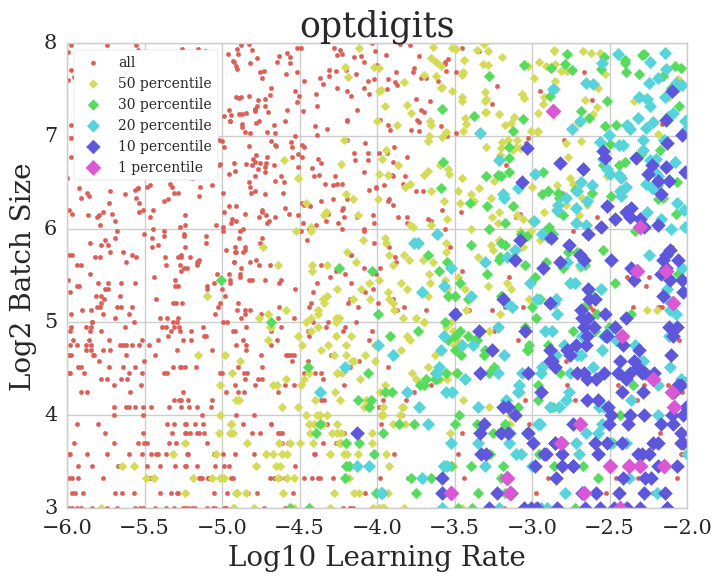

In [197]:
current_palette_7 = seaborn.color_palette("hls", 6)
seaborn.set_palette(current_palette_7)

plt.scatter(np.log10(X[:, 3]), np.log2(X[:, 1]), color=current_palette_7[0], label="all", s=10)

p = np.percentile(y, 50)
perc_50 = np.where(y < p)
plt.scatter(np.log10(X[perc_50, 3]), np.log2(X[perc_50, 1]), color=current_palette_7[1], label="50 percentile", marker="D", s=20)

p = np.percentile(y, 30)
perc_30 = np.where(y < p)
plt.scatter(np.log10(X[perc_30, 3]), np.log2(X[perc_30, 1]), color=current_palette_7[2], label="30 percentile", marker="D", s=30)

p = np.percentile(y, 20)
perc_20 = np.where(y < p)
plt.scatter(np.log10(X[perc_20, 3]), np.log2(X[perc_20, 1]), color=current_palette_7[3], label="20 percentile", marker="D", s=40)

p = np.percentile(y, 10)
perc_10 = np.where(y < p)
plt.scatter(np.log10(X[perc_10, 3]), np.log2(X[perc_10, 1]), color=current_palette_7[4], label="10 percentile", marker="D", s=50)

p = np.percentile(y, 1)
perc_1 = np.where(y < p)
plt.scatter(np.log10(X[perc_1, 3]), np.log2(X[perc_1, 1]), color=current_palette_7[5], label="1 percentile", marker="D", s=60)


plt.xlabel("Log10 Learning Rate", fontsize=20)
plt.ylabel("Log2 Batch Size", fontsize=20)
legend = plt.legend(frameon=True, fontsize=10, loc=2)
plt.xlim(-6, -2)
plt.ylim(3, 8)
plt.title(dataset, fontsize=25)
plt.savefig("/mhome/kleinaa/experiments/architecture_search/plots_res_nets/%s_res_nets_learning_rate_vs_batch_size.png" % dataset, bbox_inches='tight')

plt.show()

/home/kleinaa/virtualenv/local/lib/python3.5/site-packages/matplotlib/scale.py:101: RuntimeWarning: invalid value encountered in less_equal
  a[a <= 0.0] = 1e-300


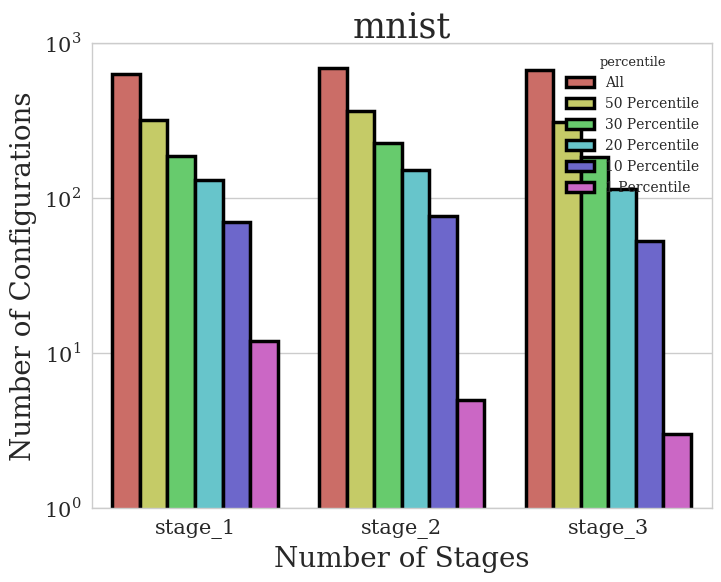

In [201]:
current_palette_7 = seaborn.color_palette("hls", 6)
seaborn.set_palette(current_palette_7)

data = []
for i in range(1, 4):
    idx = np.where(X[:, 0] == i)[0]
    data.append([len(y[idx]), "stage_%d" % i, "All"])                
        
    p = np.percentile(y, 50)
    perc_50 = np.where(y < p)
    X_perc = X[perc_50]
    y_perc = y[perc_50]
    idx = np.where(X_perc[:, 0] == i)[0]
    data.append([len(y_perc[idx]), "stage_%d" % i, "50 Percentile"])                
        
    p = np.percentile(y, 30)
    perc_30 = np.where(y < p)
    X_perc = X[perc_30]
    y_perc = y[perc_30]
    idx = np.where(X_perc[:, 0] == i)[0]
    data.append([len(y_perc[idx]), "stage_%d" % i, "30 Percentile"])                
        
    p = np.percentile(y, 20)
    perc_20 = np.where(y < p)
    X_perc = X[perc_20]
    y_perc = y[perc_20]
    idx = np.where(X_perc[:, 0] == i)[0]
    data.append([len(y_perc[idx]), "stage_%d" % i, "20 Percentile"])                
        
    p = np.percentile(y, 10)
    perc_10 = np.where(y < p)
    X_perc = X[perc_10]
    y_perc = y[perc_10]
    idx = np.where(X_perc[:, 0] == i)[0]
    data.append([len(y_perc[idx]), "stage_%d" % i, "10 Percentile"])                

    p = np.percentile(y, 1)
    perc_1 = np.where(y < p)
    X_perc = X[perc_1]
    y_perc = y[perc_1]
    idx = np.where(X_perc[:, 0] == i)[0]
    data.append([len(y_perc[idx]), "stage_%d" % i, "1 Percentile"])                

frame = DataFrame(data, columns=["num_points", "num_stages", "percentile"])
seaborn.barplot(x="num_stages", y="num_points", hue="percentile", data=frame, linewidth=2.5, palette=current_palette_7)
#plt.boxplot(boxes, positions=np.arange(1,4))
plt.ylabel("Number of Configurations", fontsize=20)
plt.xlabel("Number of Stages", fontsize=20)
plt.yscale("log")
plt.title(dataset, fontsize=25)
plt.savefig("/mhome/kleinaa/experiments/architecture_search/plots_res_nets/%s_res_nets_num_stages.png" % dataset, bbox_inches='tight')



# Training Priors

In [327]:
all_X = []
labels = []
params = []

for i, d in enumerate(datasets):
    X = []

    for c in results["reparameterization"][dataset]["configs"]:
        vec = []
        for j, k in enumerate(order):
            if c[k] is not None:
                vec.append(c[k])
            else:
                vec.append(0)
        X.append(vec)
    X = np.array(X)
    y = results["reparameterization"][dataset]["validation_error"]
    p = np.percentile(y, 1)
    perc_1 = np.where(y < p)
    all_X.extend(X[perc_1])
    labels.extend([i] * perc_1[0].shape[0])
    params.extend(results["reparameterization"][dataset]["params"][perc_1])

In [328]:
all_X = np.array(all_X)
labels = np.array(labels)
params = np.array(params)
print(all_X.shape, labels.shape, params.shape)

(686, 8) (686,) (686,)


In [329]:
from param_net.util import zero_mean_unit_var_normalization

all_X, _, _ = zero_mean_unit_var_normalization(all_X)

In [336]:
from sklearn import manifold

tsne = manifold.TSNE(n_components=2, init='random', perplexity=100)
X_tsne = tsne.fit_transform(all_X)
tsne.kl_divergence_

0.3103078603744507

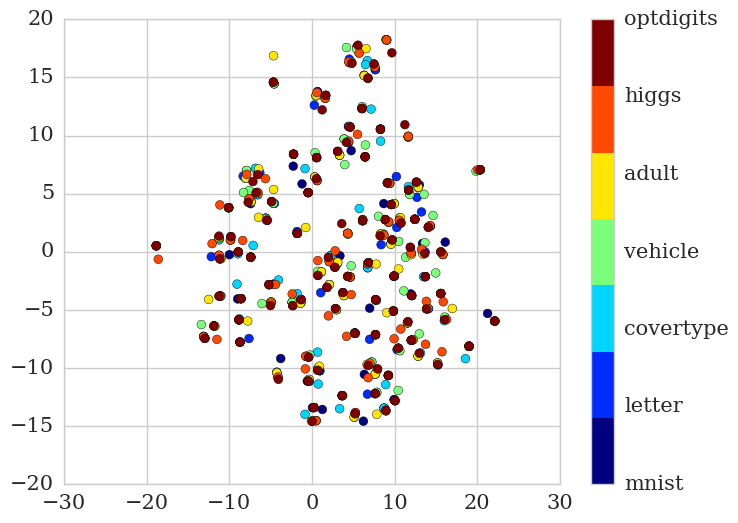

In [337]:
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels, cmap=plt.cm.get_cmap("jet", (len(datasets))), s=40)
cbar = plt.colorbar(ticks=range(len(datasets)))
cbar.ax.set_yticklabels(datasets)

In [ ]:
print(order)
all_X[:, 0] = np.log10(all_X[:, 0])
all_X[:, 1] = np.log2(all_X[:, 1])
all_X[:, 2] = np.log2(all_X[:, 2])
all_X[:, 3] = np.log10(all_X[:, 3])

In [ ]:
mean = np.mean(all_X, axis=0)
cov = np.cov(all_X, rowvar=False)

In [106]:
np.save("/mhome/kleinaa/experiments/architecture_search/mean.npy", mean)
np.save("/mhome/kleinaa/experiments/architecture_search/cov.npy", cov)
print(mean.shape, cov.shape)

(8,) (8, 8)


In [107]:
from sklearn.neighbors.kde import KernelDensity
kde = KernelDensity(kernel='gaussian', bandwidth=0.2).fit(all_X)
kde.sample()
import pickle
pickle.dump(kde, open("/home/kleinaa/kde.pkl", "wb"))

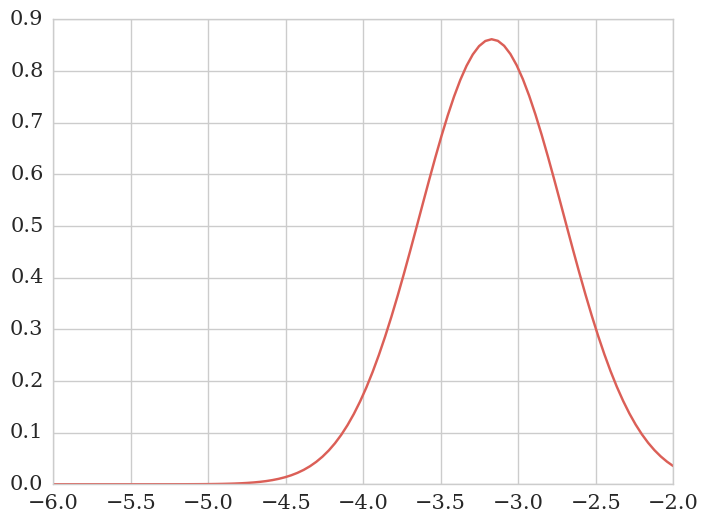

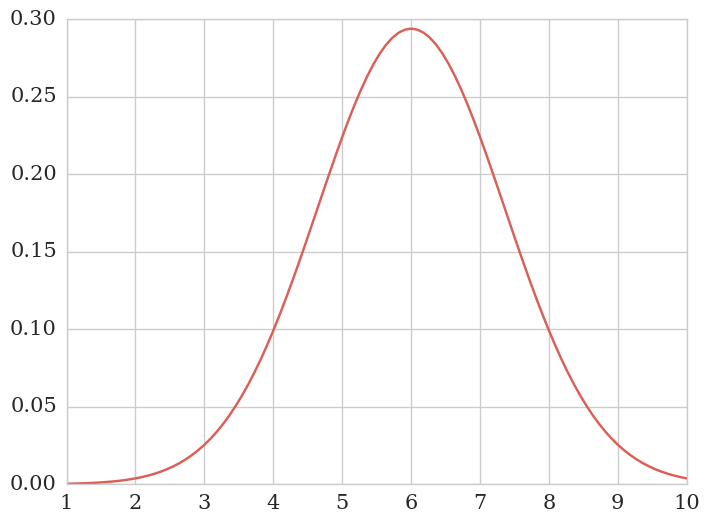

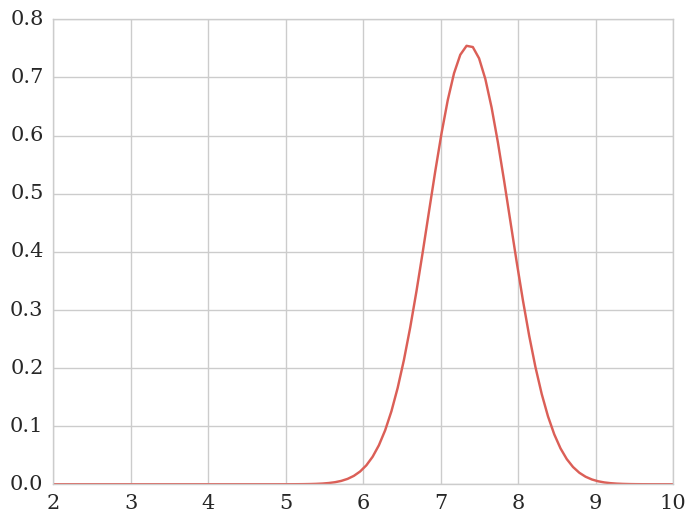

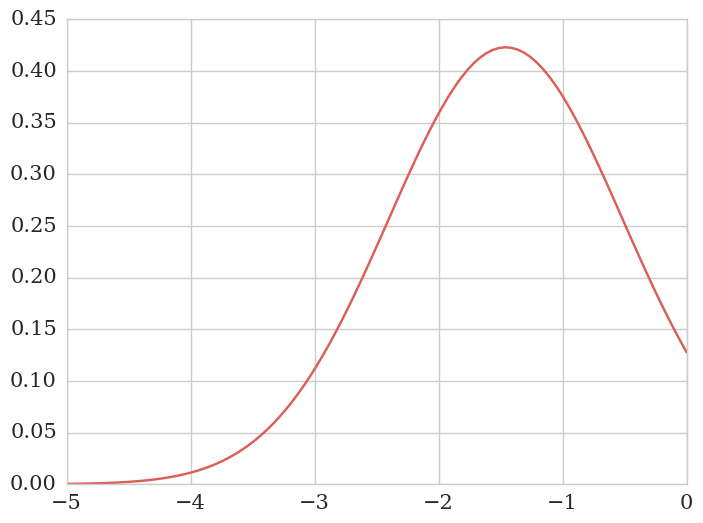

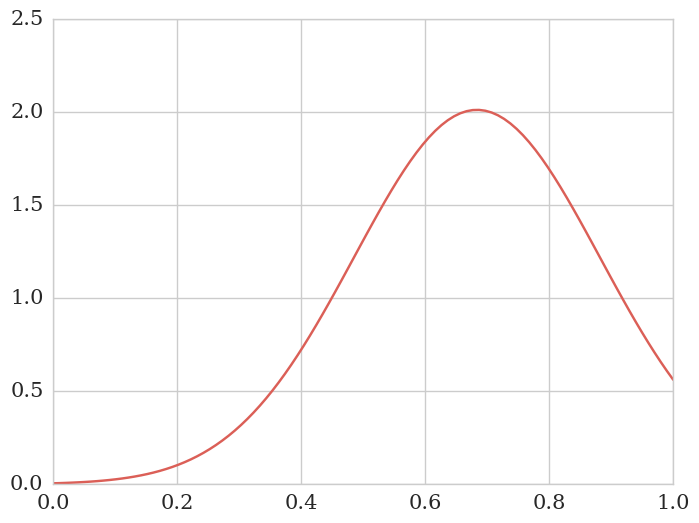

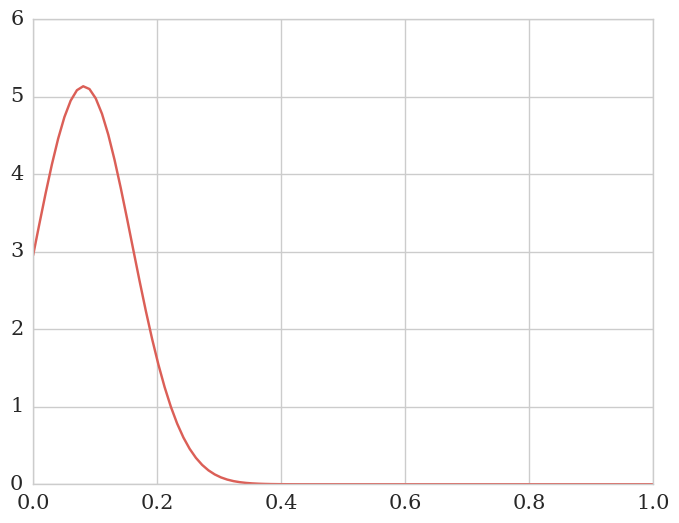

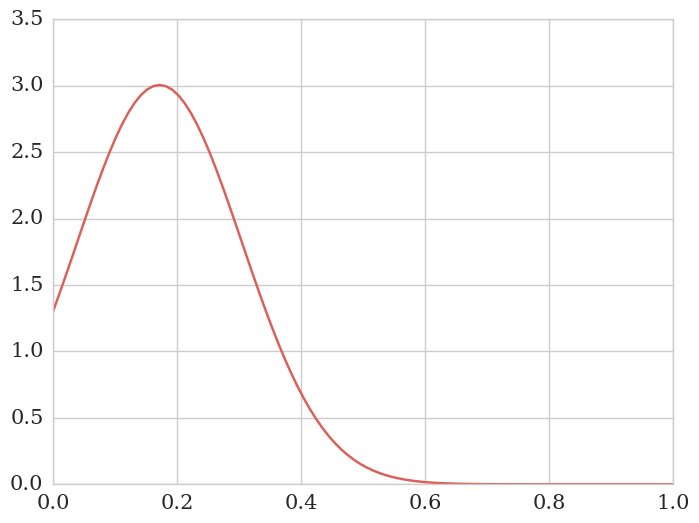

In [104]:
from scipy.stats import norm
grid = np.linspace(-6, -2, 100)
plt.plot(grid, norm.pdf(grid, loc=mean[0], scale=np.sqrt(cov[0, 0])))
plt.show()

grid = np.linspace(1, 10, 100)
plt.plot(grid, norm.pdf(grid, loc=mean[1], scale=np.sqrt(cov[1, 1])))
plt.show()

grid = np.linspace(2, 10, 100)
plt.plot(grid, norm.pdf(grid, loc=mean[2], scale=np.sqrt(cov[2, 2])))
plt.show()

grid = np.linspace(-5, 0, 100)
plt.plot(grid, norm.pdf(grid, loc=mean[3], scale=np.sqrt(cov[3, 3])))
plt.show()

grid = np.linspace(0, 1, 100)
plt.plot(grid, norm.pdf(grid, loc=mean[4], scale=np.sqrt(cov[4, 4])))
plt.show()

grid = np.linspace(0, 1, 100)
plt.plot(grid, norm.pdf(grid, loc=mean[6], scale=np.sqrt(cov[6, 6])))
plt.show()

grid = np.linspace(0, 1, 100)
plt.plot(grid, norm.pdf(grid, loc=mean[7], scale=np.sqrt(cov[7, 7])))
plt.show()

(8, 8)


([<matplotlib.axis.YTick at 0x7f5ea2499320>,
 <a list of 8 Text yticklabel objects>)

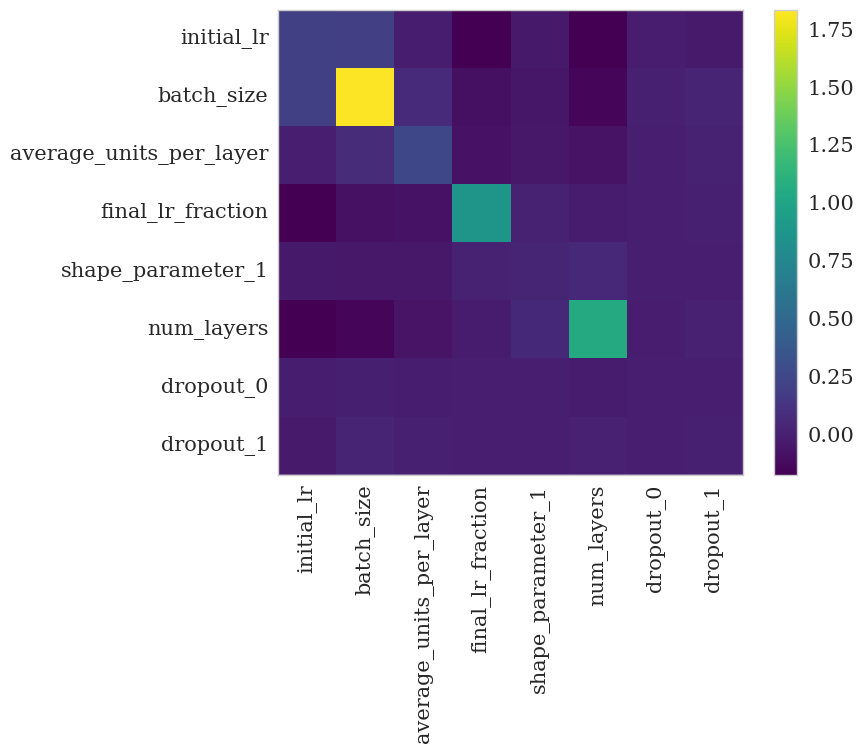

In [105]:
plt.imshow(cov, cmap="viridis", interpolation='none', aspect='equal')
plt.colorbar()
plt.grid(False)
print(cov.shape)
plt.xticks(np.arange(0, 8, 1), order, rotation='vertical')
plt.yticks(np.arange(0, 8, 1), order)